In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 1. 카드매출데이터
- 카드 사용자에 관한 정보: 나이, 성별, 지역
- 카드 사용에 관한 정보: 이용건수, 이용금액
- 그 외: 사용일자

In [4]:
card_spend = pd.read_csv('CARD_SPENDING_190809.txt', 
                         sep = '\t', dtype={'SEX_CD':str})

In [5]:
card_spend.head(); card_spend.tail()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
0  20180401    110      515          21      F      30        4      180
1  20180401    110      515          21      F      55        4       22
2  20180401    110      515          21      M      20       35      184
3  20180401    110      515          21      M      25       70      425
4  20180401    110      515          21      M      30       18       82

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
2152958  20190331    350      720          81      M      40        5       16
2152959  20190331    350      720          81      M      45       23      259
2152960  20190331    350      720          81      M      50        9       80
2152961  20190331    350      720          81      M      55        9       69
2152962  20190331    350      720          81      M      65       14      129

#### 테이블정의서:
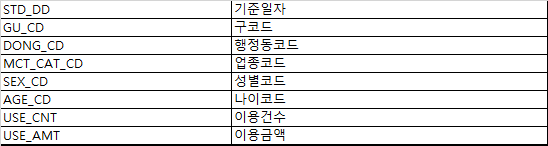

In [6]:
card_spend.head()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
0  20180401    110      515          21      F      30        4      180
1  20180401    110      515          21      F      55        4       22
2  20180401    110      515          21      M      20       35      184
3  20180401    110      515          21      M      25       70      425
4  20180401    110      515          21      M      30       18       82

#### 데이터프레임 복사

In [7]:
card_spend_copy = card_spend.copy()

In [8]:
card_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152963 entries, 0 to 2152962
Data columns (total 8 columns):
STD_DD        int64
GU_CD         int64
DONG_CD       int64
MCT_CAT_CD    int64
SEX_CD        object
AGE_CD        int64
USE_CNT       int64
USE_AMT       int64
dtypes: int64(7), object(1)
memory usage: 131.4+ MB


#### 범주형 자료와 숫자형 자료 구분
- 범주형 자료: STD_DD, GU_CD, DONG_CD, MCT_CAT_CD, SEX_CD
- 숫자형 자료: AGE_CD, USE_CNT, USE_AMT

In [9]:
dat_dict = dict({'num': ['AGE_CD', 'USE_CNT', 'USE_AMT'], 'cat': ['STD_DD','GU_CD', 'DONG_CD', 'MCT_CAT_CD', 'SEX_CD']} )

In [12]:
dat_dict['num']

['AGE_CD', 'USE_CNT', 'USE_AMT']

In [13]:
card_spend.columns

Index(['STD_DD', 'GU_CD', 'DONG_CD', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD',
       'USE_CNT', 'USE_AMT'],
      dtype='object')

In [14]:
len(card_spend['MCT_CAT_CD'].unique())

23

In [15]:
for i in card_spend.columns:
    print(i, ': ')
    if i in dat_dict['num']:
        card_spend[i].describe()
    else:
        if(len(card_spend[i].unique())>30):
            print(len(card_spend[i].unique()))
        else:
            print(card_spend[i].unique())
    print(' ')

STD_DD : 
365
 
GU_CD : 
[110 350]
 
DONG_CD : 
[515 530 540 550 560 570 580 600 615 630 640 650 670 680 690 700 710 595
 611 612 619 621 624 625 665 695 720]
 
MCT_CAT_CD : 
[21 22 34 40 42 44 50 52 62 70 71 80 81 92 10 33 20 35 43 32 31 30 60]
 
SEX_CD : 
['F' 'M']
 
AGE_CD : 


count    2.152963e+06
mean     4.182127e+01
std      1.390931e+01
min      2.000000e+01
25%      3.000000e+01
50%      4.000000e+01
75%      5.500000e+01
max      6.500000e+01
Name: AGE_CD, dtype: float64

 
USE_CNT : 


count    2.152963e+06
mean     1.132522e+02
std      3.328491e+02
min      4.000000e+00
25%      9.000000e+00
50%      2.200000e+01
75%      8.300000e+01
max      1.203800e+04
Name: USE_CNT, dtype: float64

 
USE_AMT : 


count    2.152963e+06
mean     2.428813e+03
std      7.802559e+03
min      2.000000e+00
25%      1.350000e+02
50%      4.780000e+02
75%      1.660000e+03
max      1.138252e+06
Name: USE_AMT, dtype: float64

#####  날짜별 데이터 개수의 분포

In [16]:
nums_ = [sum(card_spend.STD_DD==i) for i in card_spend.STD_DD.unique()]
how_many_daily = dict(zip( card_spend.STD_DD.unique(), nums_ ))

In [17]:
# how_many_daily

C:\Users\Choi Sung Wook\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


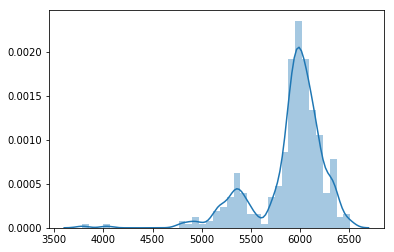

In [18]:
sns.distplot(nums_)

#### 날짜형 자료 변환 (월, 일)

#### * day 추가

In [19]:
days = []
[days.extend(nums_[i-1] * [i]) for i in range(1, len(nums_)+1)]
card_spend_copy['day'] = days

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

#### *month 추가

In [20]:
m_2018 = (card_spend[card_spend.STD_DD <20190000].STD_DD - 20180000) // 100
m_2019 = 12+(card_spend[card_spend.STD_DD >= 20190000].STD_DD - 20190000) // 100
month = m_2018.append(m_2019)
card_spend_copy['month'] = month
card_spend_copy.head() ; card_spend_copy.tail()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT  day  \
0  20180401    110      515          21      F      30        4      180    1   
1  20180401    110      515          21      F      55        4       22    1   
2  20180401    110      515          21      M      20       35      184    1   
3  20180401    110      515          21      M      25       70      425    1   
4  20180401    110      515          21      M      30       18       82    1   

   month  
0      4  
1      4  
2      4  
3      4  
4      4

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  \
2152958  20190331    350      720          81      M      40        5   
2152959  20190331    350      720          81      M      45       23   
2152960  20190331    350      720          81      M      50        9   
2152961  20190331    350      720          81      M      55        9   
2152962  20190331    350      720          81      M      65       14   

         USE_AMT  day  month  
2152958       16  365     15  
2152959      259  365     15  
2152960       80  365     15  
2152961       69  365     15  
2152962      129  365     15

#### *계절 추가

In [21]:
# 계절 벡터
season = []
season.extend(len(card_spend_copy[(card_spend_copy['month'] >= 4) & (card_spend_copy['month'] <= 5)]) * [1])
season.extend(len(card_spend_copy[(card_spend_copy['month'] >= 6) & (card_spend_copy['month'] <= 8)]) * [2])
season.extend(len(card_spend_copy[(card_spend_copy['month'] >= 9) & (card_spend_copy['month'] <= 11)]) * [3])
season.extend(len(card_spend_copy[(card_spend_copy['month'] >= 12) & (card_spend_copy['month'] <= 14)]) * [4])
season.extend(len(card_spend_copy[(card_spend_copy['month'] == 15)]) * [1])
len(season)

card_spend_copy['season'] = season; 
card_spend_copy.tail()

2152963

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  \
2152958  20190331    350      720          81      M      40        5   
2152959  20190331    350      720          81      M      45       23   
2152960  20190331    350      720          81      M      50        9   
2152961  20190331    350      720          81      M      55        9   
2152962  20190331    350      720          81      M      65       14   

         USE_AMT  day  month  season  
2152958       16  365     15       1  
2152959      259  365     15       1  
2152960       80  365     15       1  
2152961       69  365     15       1  
2152962      129  365     15       1

### 1. 숫자형 자료 탐색

#### 1.1숫자형 자료의 분포를 살펴보자 / 정규성확인

AGE_CD


<Figure size 432x288 with 0 Axes>

Skewness: 0.043445
Kurtosis: -1.146696


<Figure size 432x288 with 0 Axes>

((array([-4.9775623 , -4.8030124 , -4.70879018, ...,  4.70879018,
          4.8030124 ,  4.9775623 ]),
  array([20, 20, 20, ..., 65, 65, 65], dtype=int64)),
 (13.507610876711205, 41.82126910680769, 0.971118057592242))

USE_CNT


<Figure size 432x288 with 0 Axes>

Skewness: 10.060744
Kurtosis: 161.468853


<Figure size 432x288 with 0 Axes>

((array([-4.9775623 , -4.8030124 , -4.70879018, ...,  4.70879018,
          4.8030124 ,  4.9775623 ]),
  array([    4,     4,     4, ..., 10611, 10691, 12038], dtype=int64)),
 (185.8603815086076, 113.25222309905001, 0.558391013225324))

USE_AMT


<Figure size 432x288 with 0 Axes>

Skewness: 22.606772
Kurtosis: 2178.765226


<Figure size 432x288 with 0 Axes>

((array([-4.9775623 , -4.8030124 , -4.70879018, ...,  4.70879018,
          4.8030124 ,  4.9775623 ]),
  array([      2,       2,       2, ..., 1129109, 1131479, 1138252],
        dtype=int64)),
 (4112.31546523422, 2428.8127306414463, 0.5270458339570678))

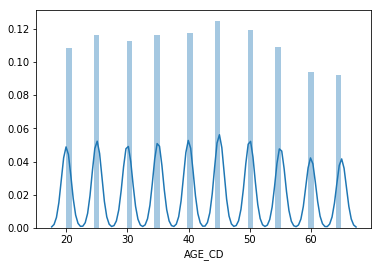

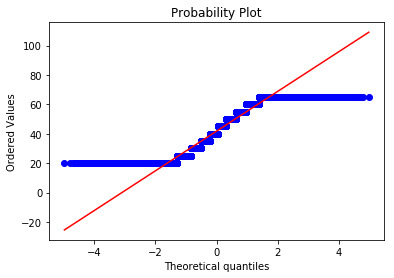

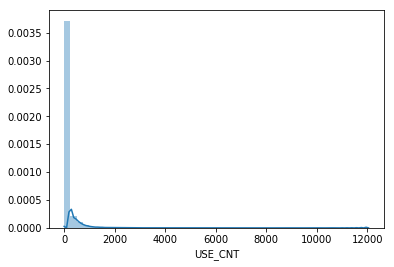

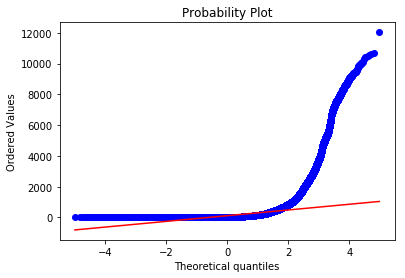

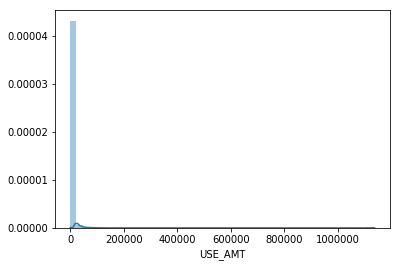

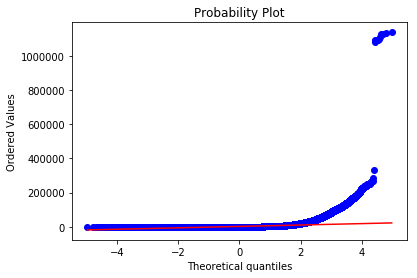

In [22]:
for i in card_spend.columns:
    if i in dat_dict['num']:
        print(i)
        plt.figure()
        sns.distplot(card_spend[i])
        print("Skewness: %f" % card_spend[i].skew())
        print("Kurtosis: %f" % card_spend[i].kurt())
        plt.figure()
        stats.probplot(card_spend[i], plot=plt)

#### 1.2산점도 ( vs. 금액)

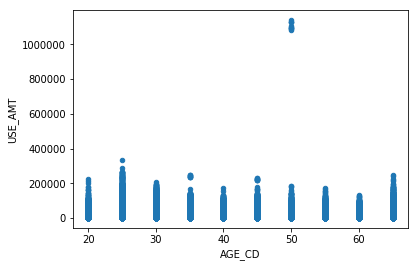

In [23]:
var = 'AGE_CD'
data = pd.concat([card_spend['USE_AMT'], card_spend[var]], axis=1)
data.plot.scatter(x=var, y = 'USE_AMT')

In [24]:
card_spend.USE_AMT.quantile(q = 0.9)       # 5백 
card_spend.USE_AMT.quantile(q = 0.99)      # 3천 2백
card_spend.USE_AMT.quantile(q = 0.999)     # 9천
card_spend.USE_AMT.quantile(q = 0.9999)    # 1억 5천 8백
card_spend.USE_AMT.quantile(q = 0.99999)   # 2억 3천6백
card_spend.USE_AMT.quantile(q = 0.999999)  # 10억 9천4백
card_spend.USE_AMT.quantile(q = 0.9999999) # 10억 9천8백

5312.0

33744.37999999989

94897.49400000228

168886.53199996985

254241.52470078086

1128668.7753636856

1136793.79884048

#### 1.3 카드 사용횟수

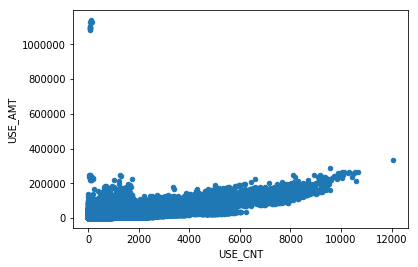

In [25]:
var = 'USE_CNT'
data = pd.concat([card_spend['USE_AMT'], card_spend[var]], axis=1)
data.plot.scatter(x=var, y = 'USE_AMT')

In [26]:
large_CNT = card_spend[card_spend['USE_CNT'] > 8000];
large_CNT.sort_values( by = 'USE_AMT', ascending = False)

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
1589982  20181225    110      615          80      M      25    12038   332155
1572301  20181222    110      615          80      M      25     9576   287188
1893433  20190216    110      615          80      M      25    10043   266889
1734745  20190119    110      615          80      M      25    10691   266734
2018392  20190309    110      615          80      M      25    10542   266677
1775307  20190126    110      615          80      M      25    10111   265333
1282001  20181103    110      615          80      M      25    10300   264741
1653542  20190105    110      615          80      M      25    10269   259389
1694327  20190112    110      615          80      M      25    10516   257248
204636   20180505    110      615          80      M      25     9884   256370
1583926  20181224    110      615          80      M      25    10458   255600
1323229  20181110    110      615          80      M      25     9924   253035
1934407  20190223    110      615          80      M      25     9967   251155
1448031  20181201    110      615          80      M      25     9185   250419
1613477  20181229    110      615          80      M      25     8091   248180
1530565  20181215    110      615          80      M      25     8937   247953
288958   20180519    110      615          80      M      25    10076   247785
2059843  20190316    110      615          80      M      25     9983   244667
1970189  20190301    110      615          80      M      25     9829   244419
1240266  20181027    110      615          80      M      25     9706   240033
2101288  20190323    110      615          80      M      25     9756   239732
1198709  20181020    110      615          80      M      25     9121   238783
1073509  20180929    110      615          80      M      25    10439   238760
1489307  20181208    110      615          80      M      25     8172   237049
1365031  20181117    110      615          80      M      25     9286   236945
1406521  20181124    110      615          80      M      25     9090   236625
1976240  20190302    110      615          80      M      25     9371   234981
993748   20180915    110      615          80      M      25     9140   234726
373827   20180602    110      615          80      M      25     9634   232668
120440   20180421    110      615          80      M      25     9115   232008
...           ...    ...      ...         ...    ...     ...      ...      ...
647150   20180718    110      615          80      M      25     8355   130216
1150531  20181012    110      615          80      F      25     8032   129971
781837   20180810    110      615          80      F      25     8537   129970
852047   20180822    110      615          80      M      25     8153   129807
694517   20180726    110      615          80      M      25     8325   129462
1676503  20190109    110      615          80      M      25     8042   129034
1751830  20190122    110      615          80      M      25     8100   127924
764184   20180807    110      615          80      M      25     8014   126848
1711263  20190115    110      615          80      M      25     8060   125781
563930   20180704    110      615          80      M      25     8023   125761
1763522  20190124    110      615          80      F      25     8100   124883
2130685  20190328    110      615          80      F      25     8485   124533
770082   20180808    110      615          80      M      25     8297   123899
451693   20180615    110      615          80      F      25     8231   123797
1717105  20190116    110      615          80      M      25     8113   123239
1682383  20190110    110      615          80      F      25     8042   122203
1875549  20190213    110      615          80      F      25     8516   122085
1922385  20190221    110      615          80      F      25     8321   120699
1798311  20190130    110      615          80      F      25 

In [27]:
large_CNT.MCT_CAT_CD.unique()

array([80], dtype=int64)

##### 업종코드가 한가지? 
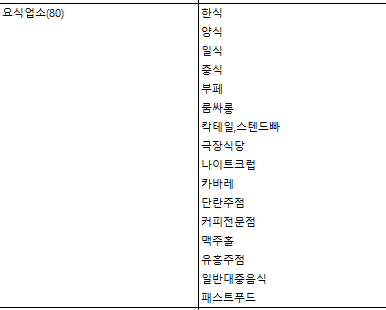
- 금액을 소비건수로 나눠서 건당 소비금액을 생각해보자
- 전체 카드 소비 금액 가운데 가장 큰 금액을 기록한 업종코드임

#### 1.4. 건당 소비금액에 대해 탐색 ㄱㄱ

In [28]:
card_spend_copy['use_per_cnt'] = card_spend.USE_AMT / card_spend.USE_CNT
card_spend_copy.head()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT  day  \
0  20180401    110      515          21      F      30        4      180    1   
1  20180401    110      515          21      F      55        4       22    1   
2  20180401    110      515          21      M      20       35      184    1   
3  20180401    110      515          21      M      25       70      425    1   
4  20180401    110      515          21      M      30       18       82    1   

   month  season  use_per_cnt  
0      4       1    45.000000  
1      4       1     5.500000  
2      4       1     5.257143  
3      4       1     6.071429  
4      4       1     4.555556

<Figure size 432x288 with 0 Axes>

Skewness: 22.606772
Kurtosis: 2178.765226


<Figure size 432x288 with 0 Axes>

((array([-4.9775623 , -4.8030124 , -4.70879018, ...,  4.70879018,
          4.8030124 ,  4.9775623 ]),
  array([      2,       2,       2, ..., 1129109, 1131479, 1138252],
        dtype=int64)),
 (4112.31546523422, 2428.8127306414463, 0.5270458339570678))

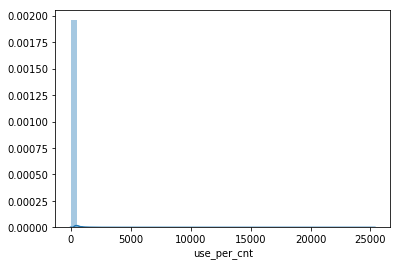

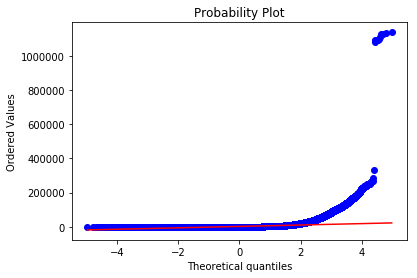

In [29]:
plt.figure()
sns.distplot(card_spend_copy['use_per_cnt'])
print("Skewness: %f" % card_spend[i].skew())
print("Kurtosis: %f" % card_spend[i].kurt())
plt.figure()
stats.probplot(card_spend[i], plot=plt)

In [30]:
card_spend_copy['use_per_cnt'].describe()
card_spend_copy['use_per_cnt'].quantile(q=[0.9,0.99,0.999])

count    2.152963e+06
mean     3.902469e+01
std      1.440984e+02
min      9.090909e-02
25%      8.888889e+00
50%      1.592857e+01
75%      3.228571e+01
max      2.536575e+04
Name: use_per_cnt, dtype: float64

0.900      66.407407
0.990     417.600000
0.999    1744.000000
Name: use_per_cnt, dtype: float64

#### 1.4.1. 건당 소비금액 로그변환

((array([-4.9775623 , -4.8030124 , -4.70879018, ...,  4.70879018,
          4.8030124 ,  4.9775623 ]),
  array([-2.39789527, -2.36712361, -2.36712361, ...,  9.98966525,
         10.00400009, 10.14115512])),
 (1.0418269383436924, 2.8770342390196086, 0.9868210523513047))

Skewness: 0.689036
Kurtosis: 1.445692


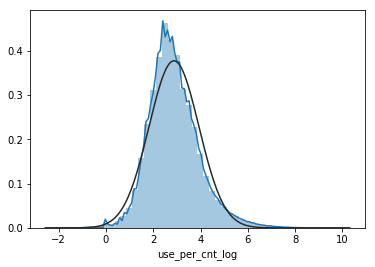

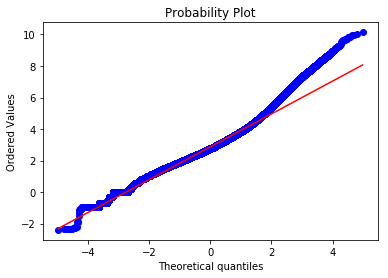

In [31]:
card_spend_copy['use_per_cnt_log'] = np.log(card_spend_copy['use_per_cnt'])
sns.distplot(card_spend_copy['use_per_cnt_log'], fit=norm)
fig = plt.figure()
stats.probplot(card_spend_copy['use_per_cnt_log'], plot=plt)
print("Skewness: %f" % card_spend_copy['use_per_cnt_log'].skew())
print("Kurtosis: %f" % card_spend_copy['use_per_cnt_log'].kurt())

- 건당 소비금액을 로그변환하는 경우 정규분포를 따른다는 사실을 확인할 수 있음!

#### 1.5 일, 월별 사용량

In [32]:
card_spend_copy.head()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT  day  \
0  20180401    110      515          21      F      30        4      180    1   
1  20180401    110      515          21      F      55        4       22    1   
2  20180401    110      515          21      M      20       35      184    1   
3  20180401    110      515          21      M      25       70      425    1   
4  20180401    110      515          21      M      30       18       82    1   

   month  season  use_per_cnt  use_per_cnt_log  
0      4       1    45.000000         3.806662  
1      4       1     5.500000         1.704748  
2      4       1     5.257143         1.659588  
3      4       1     6.071429         1.803594  
4      4       1     4.555556         1.516347

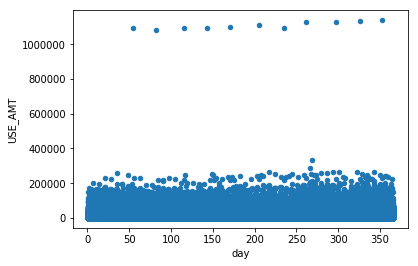

In [33]:
var = 'day'
data = pd.concat([card_spend_copy['USE_AMT'], card_spend_copy[var]], axis=1)
data.plot.scatter(x=var, y = 'USE_AMT')

- 하루에 10억 매출 찍는 날이 있는데 뭔가 주기성을 띤다.. 확인해보자 

In [34]:
card_spend_copy.sort_values(by='USE_AMT', inplace = False, ascending = False).head(20)

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  \
2074129  20190318    350      619          70      M      50      123   
1918965  20190220    350      619          70      M      50       72   
1754303  20190122    350      619          70      M      50      121   
1550574  20181218    350      619          70      M      50      135   
1212955  20181022    350      619          70      M      50       71   
1007957  20180917    350      619          70      M      50       88   
691093   20180725    350      619          70      M      50       70   
1391072  20181121    350      619          70      M      50       66   
848642   20180821    350      619          70      M      50       70   
321636   20180524    350      619          70      M      50       57   
489965   20180621    350      619          70      M      50       65   
1589982  20181225    110      615          80      M      25    12038   
1572301  20181222    110      615          80      M      25     9576   
1893433  20190216    110      615          80      M      25    10043   
1734745  20190119    110      615          80      M      25    10691   
2018392  20190309    110      615          80      M      25    10542   
1775307  20190126    110      615          80      M      25    10111   
1282001  20181103    110      615          80      M      25    10300   
1653542  20190105    110      615          80      M      25    10269   
1694327  20190112    110      615          80      M      25    10516   

         USE_AMT  day  month  season   use_per_cnt  use_per_cnt_log  
2074129  1138252  352     15       1   9254.081301         9.132820  
1918965  1131479  326     14       4  15714.986111         9.662370  
1754303  1129109  297     13       4   9331.479339         9.141149  
1550574  1126231  262     12       4   8342.451852         9.029112  
1212955  1108389  205     10       3  15611.112676         9.655738  
1007957  1098636  170      9       3  12484.500000         9.432243  
691093   1095046  116      7       2  15643.514286         9.657812  
1391072  1092718  235     11       3  16556.333333         9.714524  
848642   1092105  143      8       2  15601.500000         9.655122  
321636   1090946   54      5       1  19139.403509         9.859504  
489965   1083279   82      6       2  16665.830769         9.721116  
1589982   332155  269     12       4     27.592208         3.317533  
1572301   287188  266     12       4     29.990393         3.400877  
1893433   266889  322     14       4     26.574629         3.279957  
1734745   266734  294     13       4     24.949397         3.216850  
2018392   266677  343     15       1     25.296623         3.230671  
1775307   265333  301     13       4     26.242014         3.267362  
1282001   264741  217     11       3     25.703010         3.246608  
1653542   259389  280     13       4     25.259422         3.229199  
1694327   257248  287     13       4     24.462533         3.197143

- 10억 매출의 주범은 의료기관 (아이돌 소속사 성형수술? 건강검진? )
- 비슷한 시기에 몰림 0524, 0621, 0725, 0821, 0917
- 건수는 57~88 사이로 그리 높지는 않음
- 건당소비금액 1200~1900만 사이
- 전체 액수의 변동 자체가 크지 않으며 주기성을 띠므로 제외시켜도 되지않을까 싶음

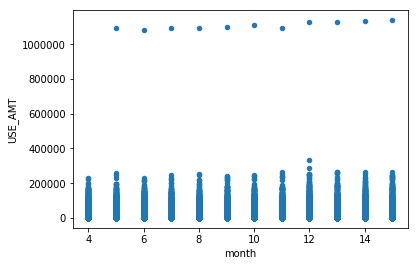

In [35]:
var = 'month'
data = pd.concat([card_spend_copy['USE_AMT'], card_spend_copy[var]], axis=1)
data.plot.scatter(x=var, y = 'USE_AMT')

- 확실히 매 달 뭐가 있다

#### 어쨋든 이상치 제거해야된다는 사실 확신함
- 의료기관 10억의 정체는?
- 지역별 / 업종별 코드 확인이 필요함 (해결)

#### 1.5.1. 일, 월 vs. 건당소비금액 

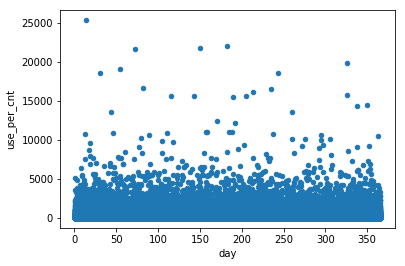

In [36]:
var = 'day'
data = pd.concat([card_spend_copy['use_per_cnt'], card_spend_copy[var]], axis=1)
data.plot.scatter(x=var, y = 'use_per_cnt')

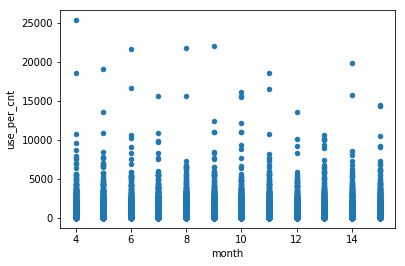

In [37]:
var = 'month'
data = pd.concat([card_spend_copy['use_per_cnt'], card_spend_copy[var]], axis=1)
data.plot.scatter(x=var, y = 'use_per_cnt')

- 한 번에 최대 2500만원 정도를 긁는듯함 
- 건당소비금액이 높은 경우 (0.99분위수 = 419만원 이상) 의 업종코드 살펴보자

#### 1.6. 업종코드를 단어로 표현하여 데이터프레임에 추가

In [38]:
market_name = dict({10:'숙박', 20:'레저용품',21: '레저업소', 22:'문화취미', 30:'가구', 31:'전기', 
                    32:'주방용구', 33:'연료판매', 34:'광학제품', 35: '가전', 40:'유통업',42: '의복',
                    43: '작물', 44: '신변잡화', 50: '서적문구',52: '사무통신',60: '자동차판매',
                    62: '자동차정비', 70:'의료기관', 71:'보건위생', 80:'요식업소', 81: '음료식품', 
                    92: '수리서비스'})
y = list(card_spend.MCT_CAT_CD.values)
mkt_name = [market_name[i] for i in y ]
card_spend_copy['market_name'] = mkt_name
card_spend_copy.head()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT  day  \
0  20180401    110      515          21      F      30        4      180    1   
1  20180401    110      515          21      F      55        4       22    1   
2  20180401    110      515          21      M      20       35      184    1   
3  20180401    110      515          21      M      25       70      425    1   
4  20180401    110      515          21      M      30       18       82    1   

   month  season  use_per_cnt  use_per_cnt_log market_name  
0      4       1    45.000000         3.806662        레저업소  
1      4       1     5.500000         1.704748        레저업소  
2      4       1     5.257143         1.659588        레저업소  
3      4       1     6.071429         1.803594        레저업소  
4      4       1     4.555556         1.516347        레저업소

In [39]:
above_99 = card_spend_copy[card_spend_copy['use_per_cnt']>4190]
above_99.market_name.unique()
above_99.sort_values(by = 'use_per_cnt', ascending=False).head(30)

array(['의료기관', '자동차판매', '신변잡화', '주방용구', '전기', '가전', '레저용품', '서적문구', '숙박',
       '작물', '레저업소', '가구', '자동차정비', '의복', '보건위생', '사무통신', '문화취미', '수리서비스',
       '음료식품'], dtype=object)

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  \
78544    20180414    110      630          10      M      60        4   
1077583  20180929    350      670          62      M      55        4   
888502   20180828    350      595          32      F      45        4   
427302   20180611    110      600          71      M      35        4   
1918162  20190220    350      595          32      M      45        5   
321636   20180524    350      619          70      M      50       57   
176115   20180430    350      611          35      M      55        4   
1437631  20181129    350      580          92      F      60        4   
489965   20180621    350      619          70      M      50       65   
1391072  20181121    350      619          70      M      50       66   
1261431  20181030    350      670          62      M      55        4   
1918965  20190220    350      619          70      M      50       72   
691093   20180725    350      619          70      M      50       70   
1212955  20181022    350      619          70      M      50       71   
848642   20180821    350      619          70      M      50       70   
1114446  20181006    110      600          10      M      55        4   
2058509  20190316    110      530          10      F      55        5   
1987696  20190304    110      615          35      M      40        5   
1535476  20181216    110      515          92      F      35        9   
257435   20180514    110      530          10      F      55        4   
1007957  20180917    350      619          70      M      50       88   
1135956  20181009    350      640          35      M      35        4   
931394   20180904    350      640          35      F      55        4   
1090891  20181002    110      615          35      M      30        4   
1110818  20181005    350      595          35      M      50        4   
941756   20180906    350      595          32      M      50        4   
658823   20180720    110      600          71      M      35        4   
270486   20180516    110      580          20      F      55        4   
1406127  20181124    110      600          10      F      55        4   
73164    20180413    110      670          50      F      45        4   

         USE_AMT  day  month  season   use_per_cnt  use_per_cnt_log  \
78544     101463   14      4       1  25365.750000        10.141155   
1077583    88459  182      9       3  22114.750000        10.004000   
888502     87200  150      8       2  21800.000000         9.989665   
427302     86600   72      6       2  21650.000000         9.982761   
1918162    99440  326     14       4  19888.000000         9.897872   
321636   1090946   54      5       1  19139.403509         9.859504   
176115     74460   30      4       1  18615.000000         9.831723   
1437631    74290  243     11       3  18572.500000         9.829437   
489965   1083279   82      6       2  16665.830769         9.721116   
1391072  1092718  235     11       3  16556.333333         9.714524   
1261431    64412  213     10       3  16103.000000         9.686761   
1918965  1131479  326     14       4  15714.986111         9.662370   
691093   1095046  116      7       2  15643.514286         9.657812   
1212955  1108389  205     10       3  15611.112676         9.655738   
848642   1092105  143      8       2  15601.500000         9.655122   
1114446    62020  189     10       3  15505.000000         9.648918   
2058509    72461  350     15       1  14492.200000         9.581366   
1987696    71623  338     15       1  14324.600000         9.569734   
1535476   122445  260     12       4  13605.000000         9.518193   
257435     54238   44      5       1  13559.500000         9.514843   
1007957  1098636  170      9       3  12484.500000         9.432243   
1135956    48524  192     10       3  12131.000000         9.403519   
931394     44339  157      9       3  11084.750000         9.313326   
1090891    44300  185     10       3  11075

#### 1.7. 카드사용횟수도 살펴볼 필요가 있음
- 이것도 로그변환 필요?

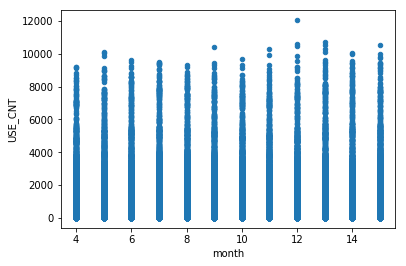

In [40]:
var = 'month'
data = pd.concat([card_spend_copy['USE_CNT'], card_spend_copy[var]], axis=1)
data.plot.scatter(x=var, y = 'USE_CNT')

- 월별 사용 횟수

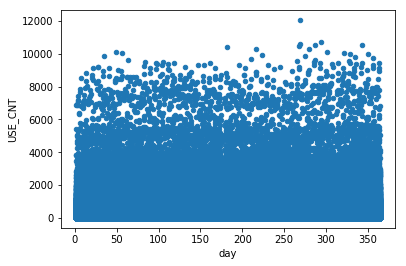

In [41]:
var = 'day'
data = pd.concat([card_spend_copy['USE_CNT'], card_spend_copy[var]], axis=1)
data.plot.scatter(x=var, y = 'USE_CNT')

- 일별 사용횟수

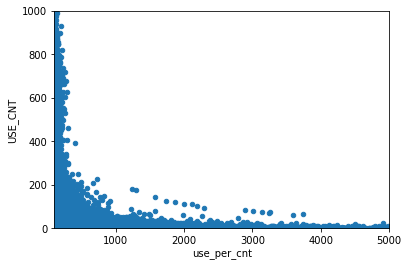

In [42]:
var = 'use_per_cnt'
data = pd.concat([card_spend_copy['USE_CNT'], card_spend_copy[var]], axis=1)
data.plot.scatter(x=var, y = 'USE_CNT', xlim = (100,5000), ylim = (0,1000))

### 2. 범주형 자료 탐색

- 날짜를 주별 / 월별로 재구성할 필요 있음 (해결)

#### 2.1. 주어진 범주형 자료의 로그변환된 건당소비액 boxplot으로 표현

#### 2.1.1. 종로구 / 노원구

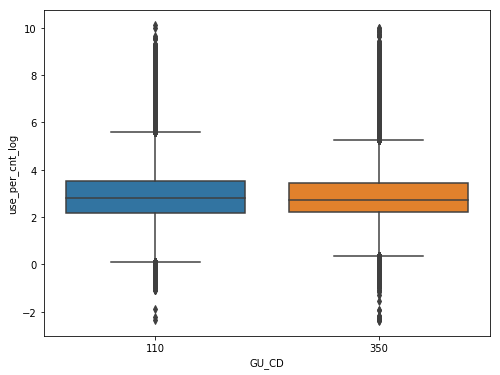

In [43]:
var = 'GU_CD'
data = pd.concat([card_spend_copy['use_per_cnt_log'], card_spend[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="use_per_cnt_log", data=data)
#fig.axis(ymin=0, ymax=3000);

- 성별에 따른 차이는 크지 않을 듯 함 
- 이상치를 고려한다면 차이가 있을 수도..이상치 처리 어떻게??

#### 2.1.2. 행정동

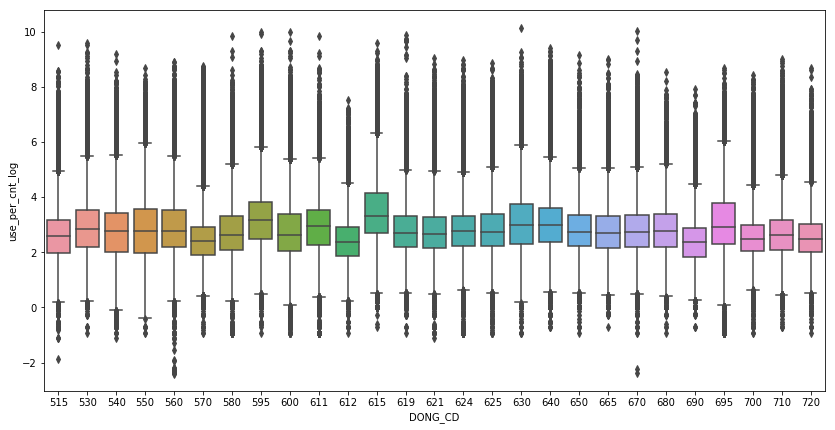

In [44]:
var = 'DONG_CD'
data = pd.concat([card_spend_copy['use_per_cnt_log'], card_spend[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 7))
fig = sns.boxplot(x=var, y="use_per_cnt_log", data=data)
#fig.axis(ymin=0, ymax=30000);

- 행정구에 따른 '건당소비액'의 평균의 차이는 크게 두드러지지는 않으나 어느 정도 존재할 것으로 예상됨

####  2.1.3. 업종별

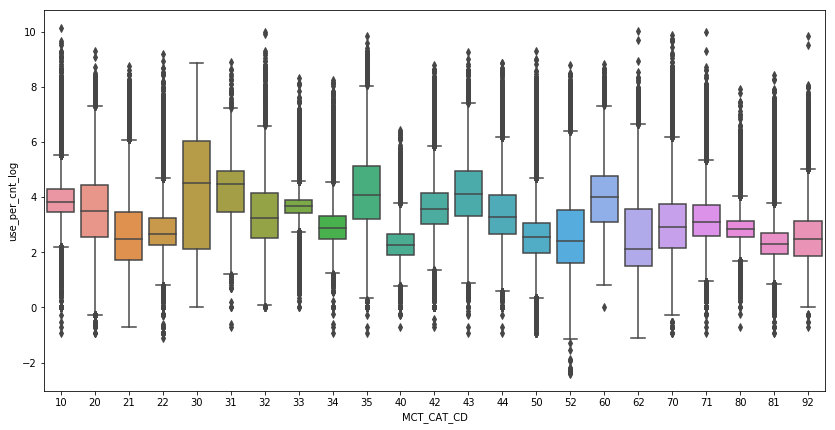

In [45]:
var = 'MCT_CAT_CD'
data = pd.concat([card_spend_copy['use_per_cnt_log'], card_spend[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 7))
fig = sns.boxplot(x=var, y="use_per_cnt_log", data=data)
# fig.axis(ymin=0, ymax=30000);

- 업종에 따른 '건당소비액'의 평균의 차이는 크다고 보여지기 때문에 얘네들을 파고들어봄직함
- 일단 분포가 제각각임; 가운데가 뾰족하거나 오른쪽으로 꼬리가 길거나 정규성을 띠거나 등등
- 추후에 유통 데이터 / 유동인구 데이터와 엮어서 탐색할 필요가 있음

#### 2.1.4. 성별

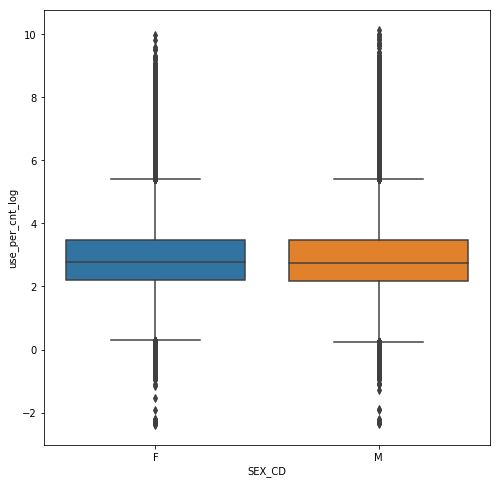

In [46]:
var = 'SEX_CD'
data = pd.concat([card_spend_copy['use_per_cnt_log'], card_spend[var]], axis=1)
f, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(x=var, y='use_per_cnt_log', data=data)
#fig.axis(ymin=0, ymax=30000);

#### 2.1.5. 일자 / 월별

- 로그변환된 값이라 그런지 일에 따른 평균의 차이는 크지 않아보임(대체적으로 비슷한 분포)
- 대체로 오른쪽으로 꼬리가 길다 

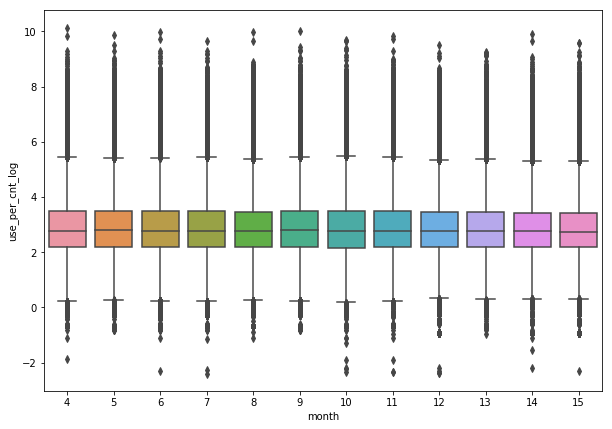

In [47]:
var = 'month'
data = pd.concat([card_spend_copy['use_per_cnt_log'], card_spend_copy[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 7))
fig = sns.boxplot(x=var, y="use_per_cnt_log", data=data)

- 로그변환된 값.. 이상치 고려하면 평균의 차이가 유의미할지도

#### 추가하면 좋을 것들 / 드는 생각

##### 전처리단계
- 시계열데이터라고 치면 어떻게 분석할 것인가?
- 건당소비액이 높은 업종: 30, 31, 35, 43, 60 위주로 분석 (원인분석)
- 같은 기간 1. 유동인구데이터 , 2. 유통데이터 추가 : 소비금액과 관련지어보기
- 상관관계를 보자니 feature의 개수가 많지는 않네 -> 세분화
- 분산분석 / xgboost & lightgbm 적용 feature selection (우선 업종별로 진행?)
- 이상치(아웃라이어) 어떻게 처리하면 좋을지?
- 건당소비액 이외의 추가할만한 지표가 있을까?
- (상관관계분석) 건당소비액의 크기에 따른 상관관계가 다를 수도 있음
- (PCA 하게된다면 업종에 따라 할듯)
##### 모델단계
- LASSO, ElasticNet Reg, Kernel Ridge Reg, GradBoost (XGB, lightgbm) 등등

### 3. 업종별 EDA

#### 3.0. week column 추가

- 주단위 label 추가
- 평일 / 주말로 label 추가
- 주말, 평일의 평균값을 비교해볼까?
- SEX_CD 가 object라서 에러 뜬다 -> string으로 바꿈
- object를 전부 string으로 바꾸자 (해결: values.astype(str) 사용)

- 계절 / 날씨 레이블 추가? (해결  봄:1, 여름:2, 가을:3, 겨울:4); 날씨 데이터는 보류

In [48]:
card_spend_copy.tail()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  \
2152958  20190331    350      720          81      M      40        5   
2152959  20190331    350      720          81      M      45       23   
2152960  20190331    350      720          81      M      50        9   
2152961  20190331    350      720          81      M      55        9   
2152962  20190331    350      720          81      M      65       14   

         USE_AMT  day  month  season  use_per_cnt  use_per_cnt_log market_name  
2152958       16  365     15       1     3.200000         1.163151        음료식품  
2152959      259  365     15       1    11.260870         2.421334        음료식품  
2152960       80  365     15       1     8.888889         2.184802        음료식품  
2152961       69  365     15       1     7.666667         2.036882        음료식품  
2152962      129  365     15       1     9.214286         2.220755        음료식품

In [49]:
week = [i //7 + 1 for i in days]; 
# day_label = [ 1 if 1*((i % 7) == 1 or (i%7) == 0) else 0 for i in days ];
day_label = [ 1* ((i % 7) == 1 or (i%7) == 0) for i in days ];
card_spend_copy['week'] = week
card_spend_copy['day_label'] = day_label
card_spend_copy['MCT_CAT_CD'] = card_spend['MCT_CAT_CD']; card_spend_copy.head()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT  day  \
0  20180401    110      515          21      F      30        4      180    1   
1  20180401    110      515          21      F      55        4       22    1   
2  20180401    110      515          21      M      20       35      184    1   
3  20180401    110      515          21      M      25       70      425    1   
4  20180401    110      515          21      M      30       18       82    1   

   month  season  use_per_cnt  use_per_cnt_log market_name  week  day_label  
0      4       1    45.000000         3.806662        레저업소     1          1  
1      4       1     5.500000         1.704748        레저업소     1          1  
2      4       1     5.257143         1.659588        레저업소     1          1  
3      4       1     6.071429         1.803594        레저업소     1          1  
4      4       1     4.555556         1.516347        레저업소     1          1

#### 3.1. 업종별 데이터프레임 생성

In [50]:
cat_num = card_spend_copy.MCT_CAT_CD.unique()
cat_num.sort();
cat_num_str = [str(i) for i in cat_num];
cat_name = ['MCT_'+ i for i in cat_num_str];
# cat_dict = dict(zip(cat_name,cat_num)); cat_dict;
for i in range(len(cat_num)):
    exec("%s = card_spend_copy[card_spend_copy.MCT_CAT_CD == %d]" % (cat_name[i], cat_num[i]));

#### 3.2. 성별에 대한 건당소비액

- 업종별로 성별에 따른 전체소비액 / 건당소비액은 어떤 차이가 있을까?
- 업종별로 성별에 따른 전체소비액 / 건당소비액은 시간에 따라 차이가 있을까? 

#### weekly, monthly 업종에 따른 건당소비액 추이, 성별 비교

In [51]:
market_names = list(market_name.values());
market_index = list(market_name.keys());

#### matplotlib에 한글폰트 추가..잘안됨

In [52]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


#### 코-드

C:\Users\Choi Sung Wook\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Choi Sung Wook\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Choi Sung Wook\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


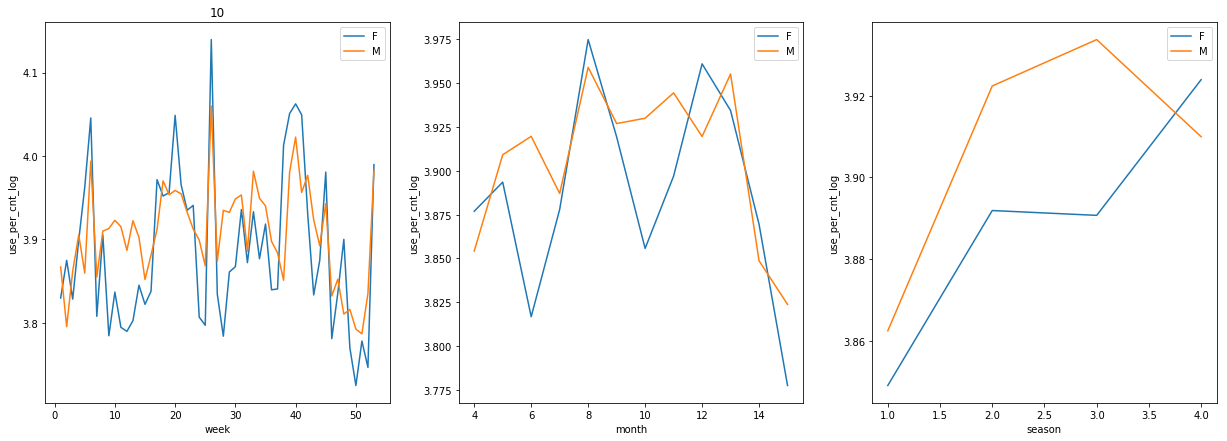

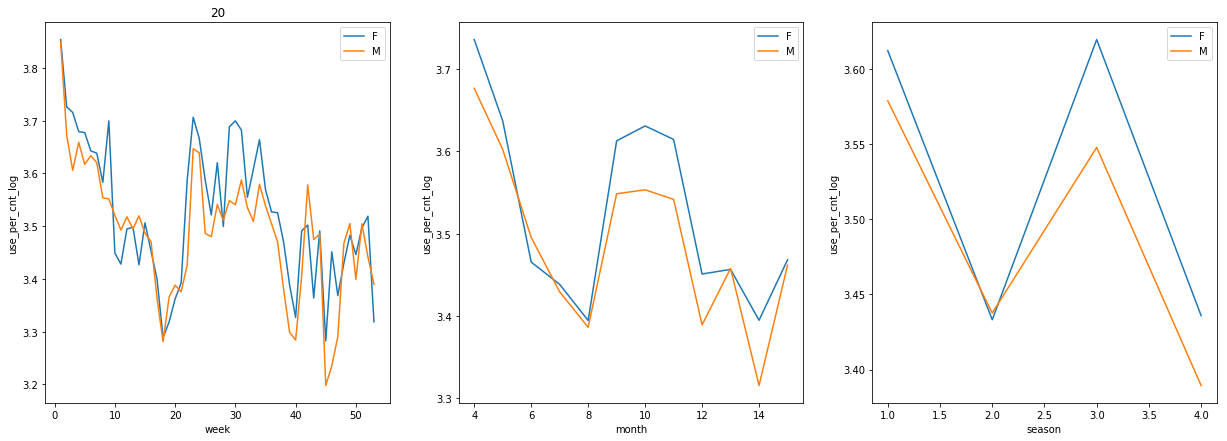

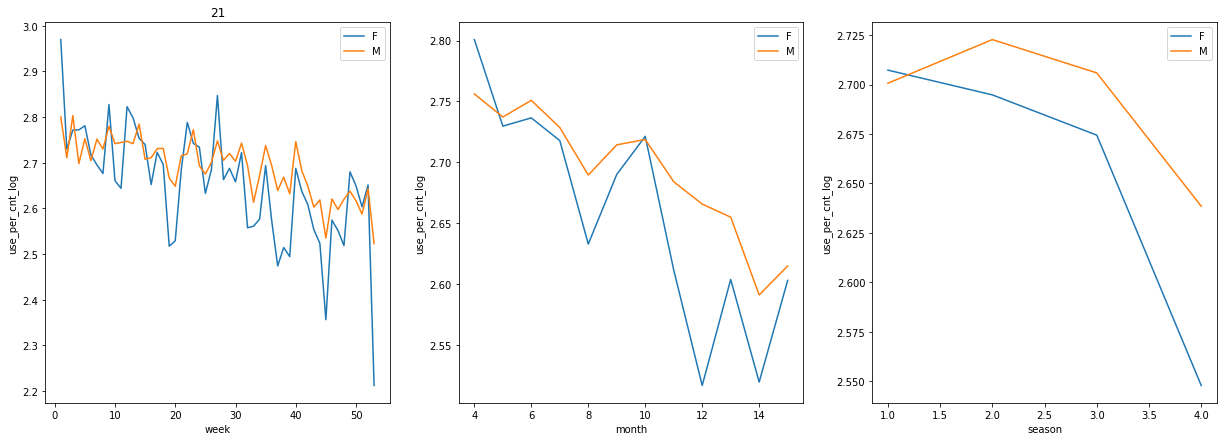

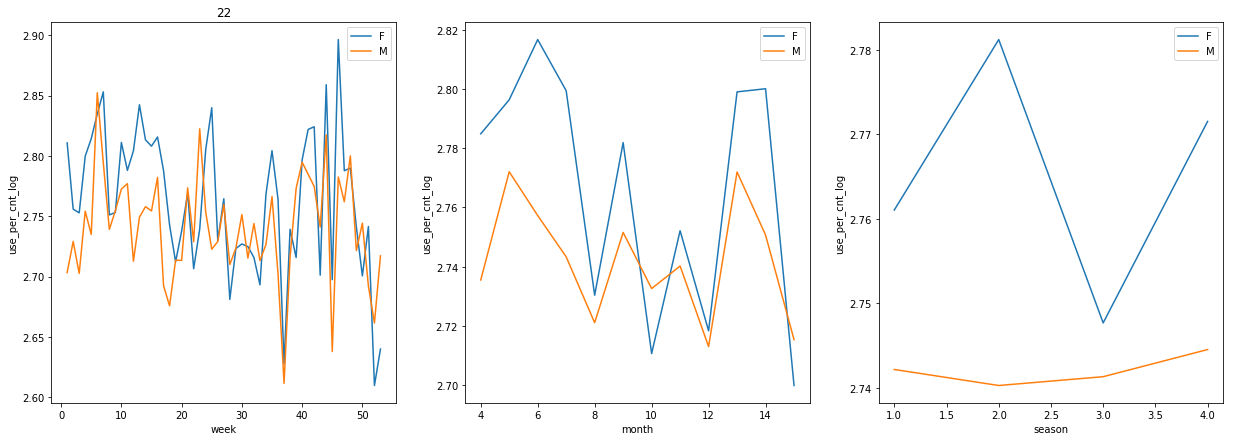

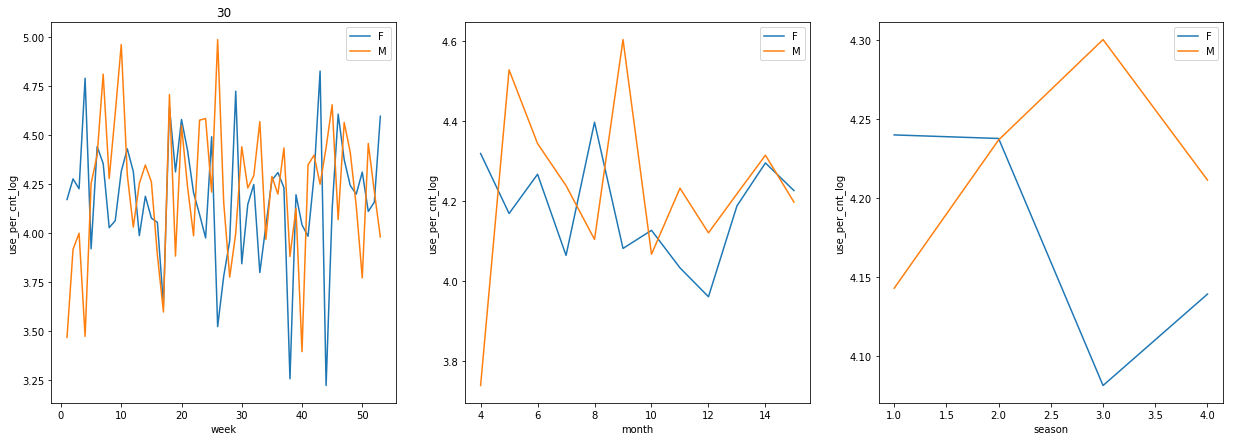

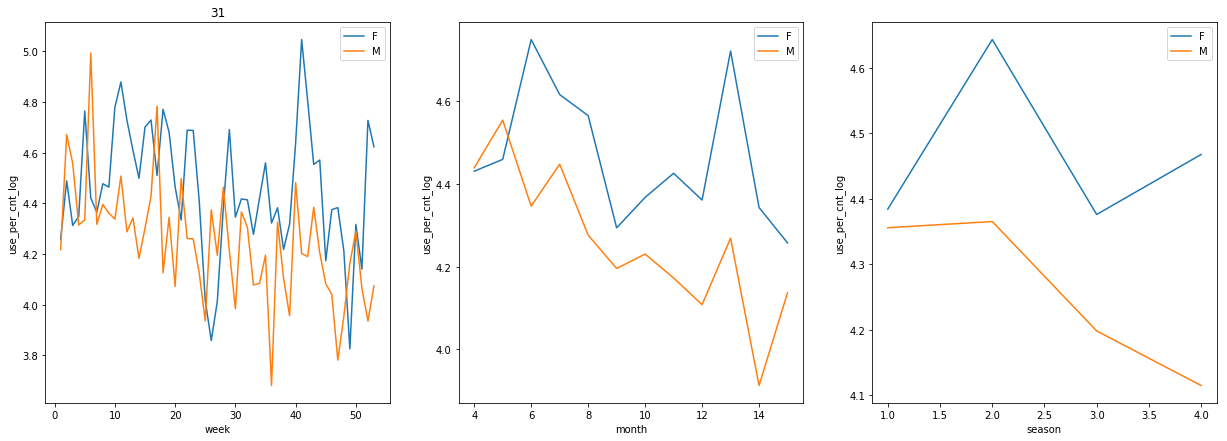

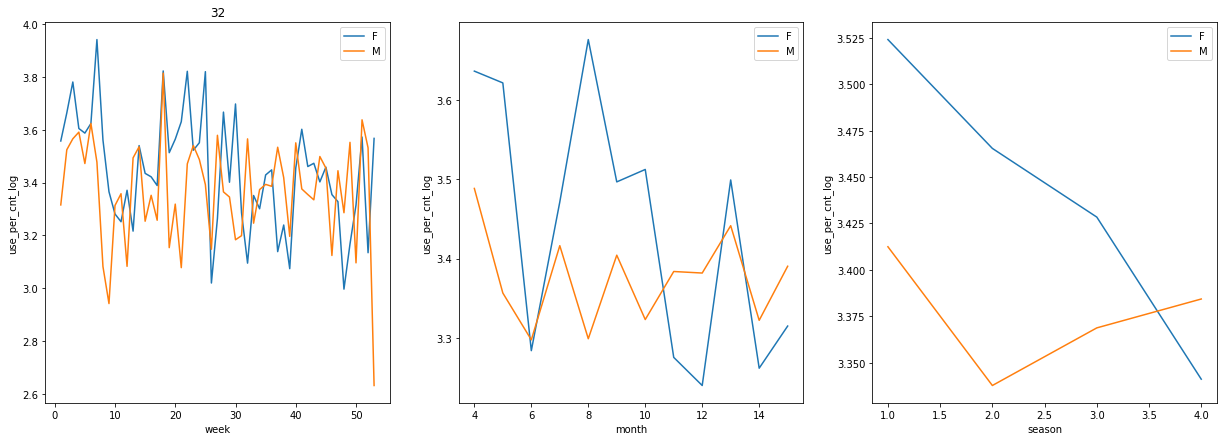

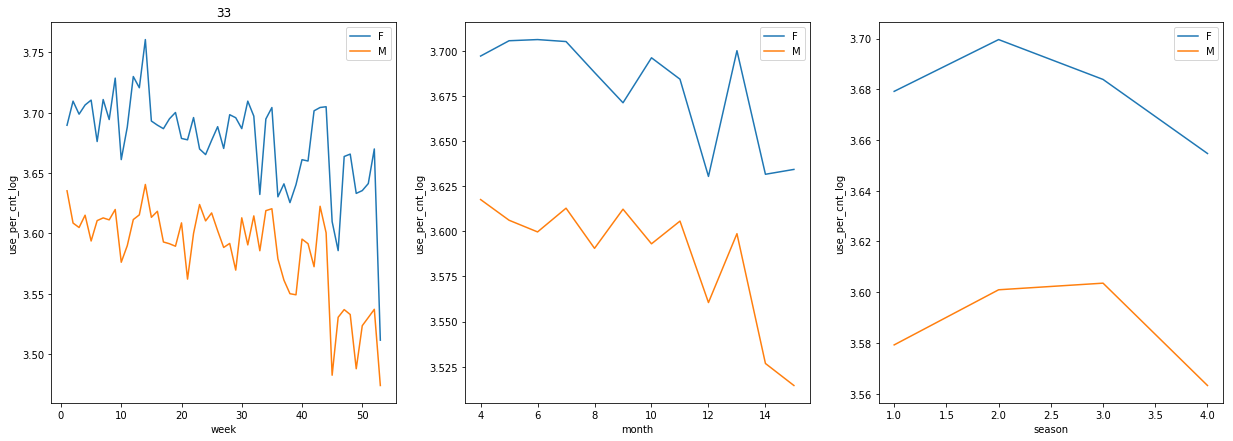

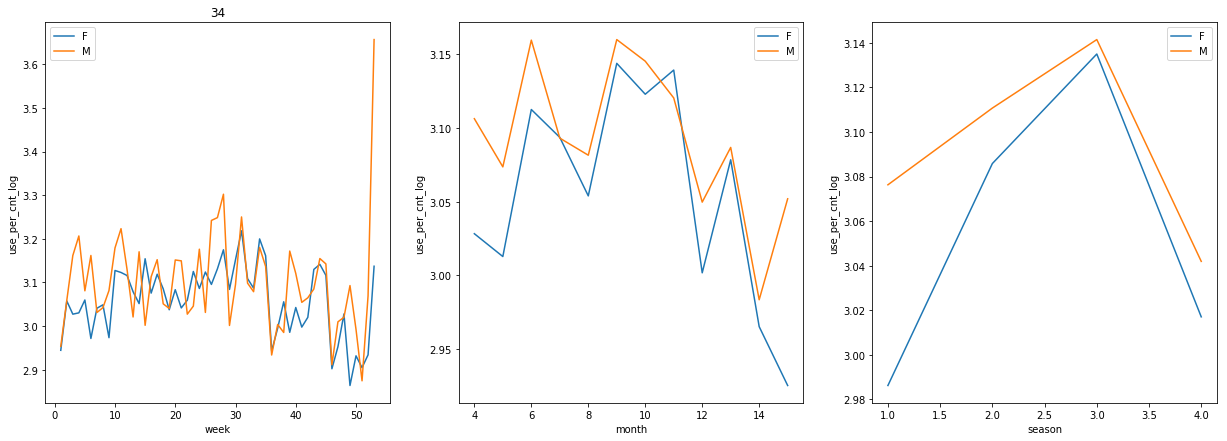

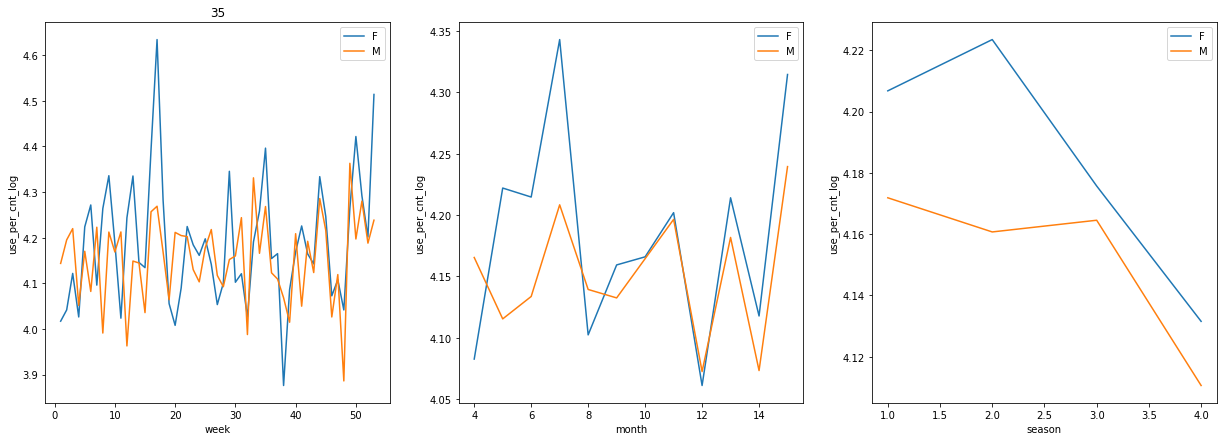

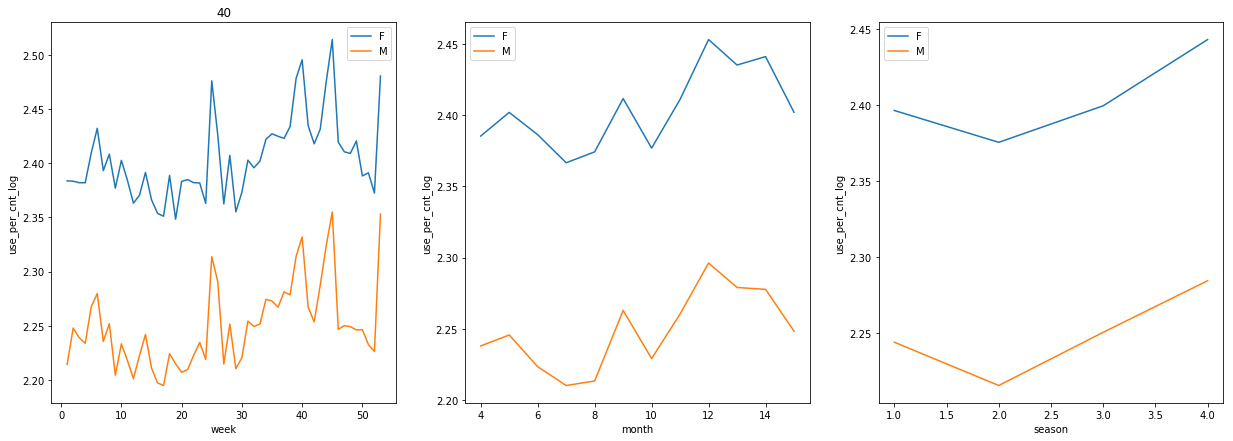

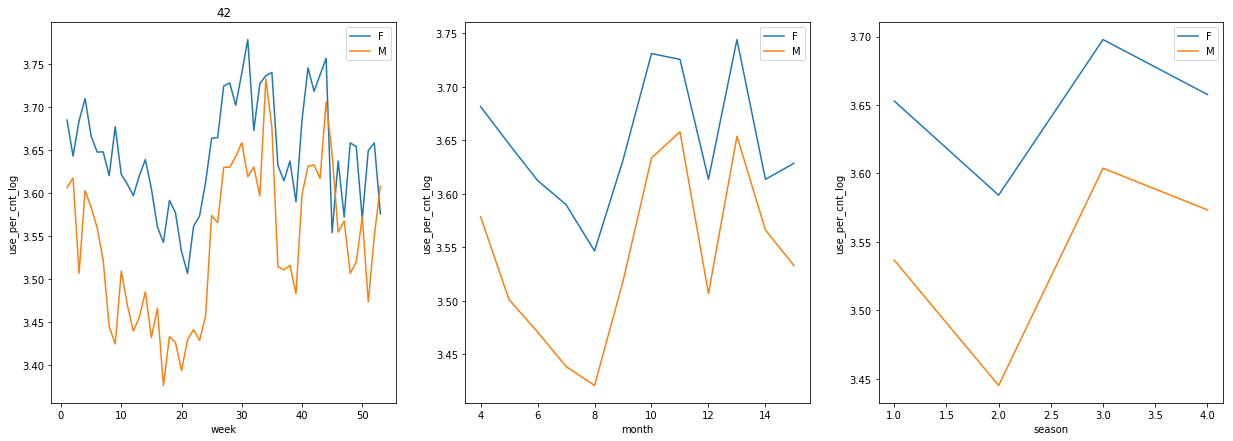

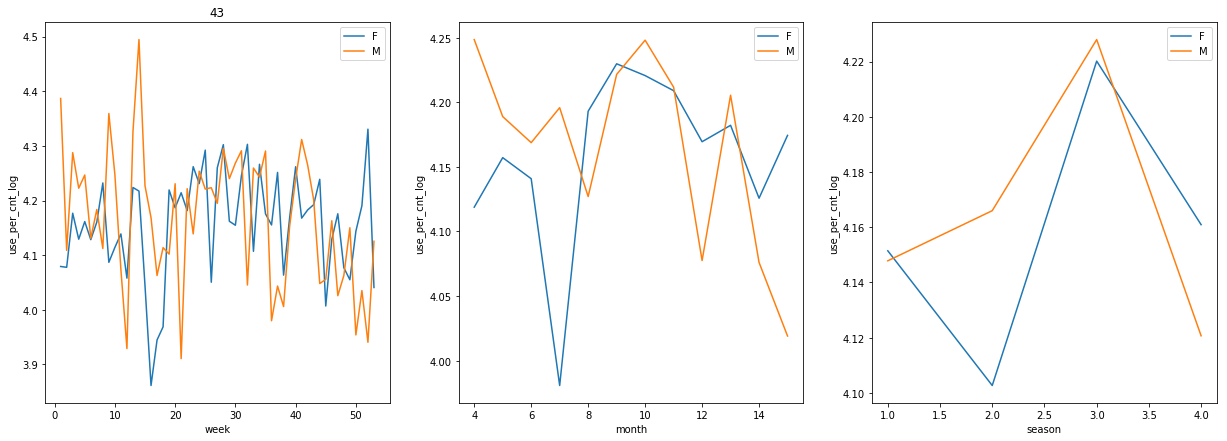

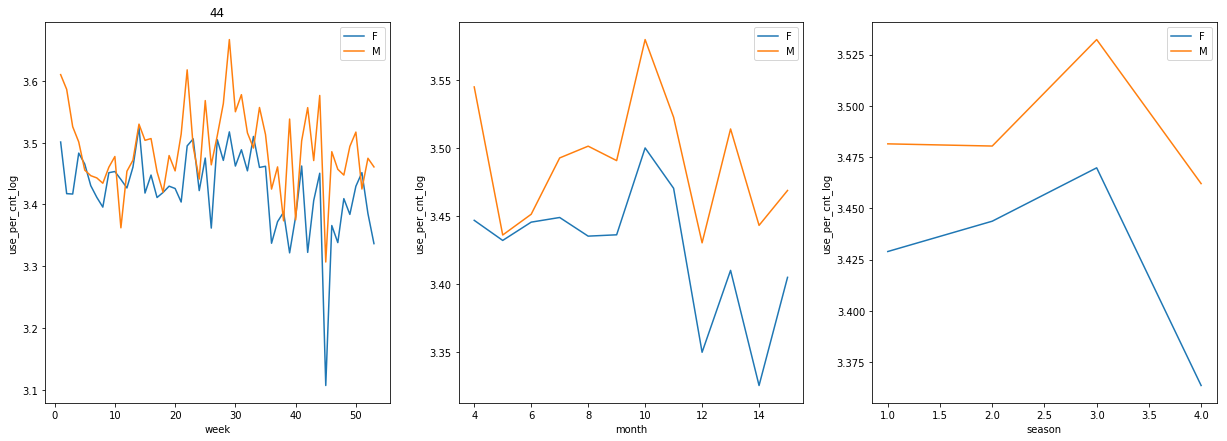

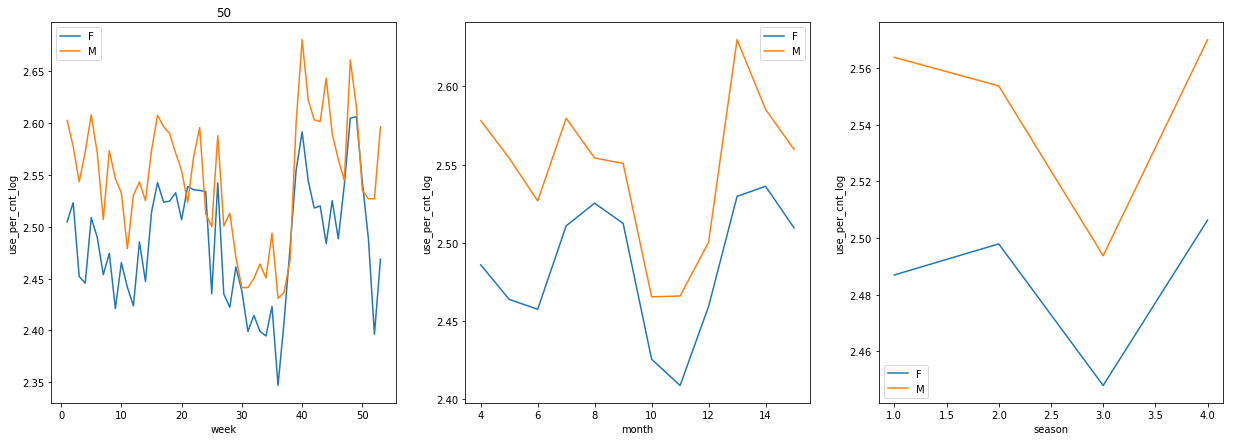

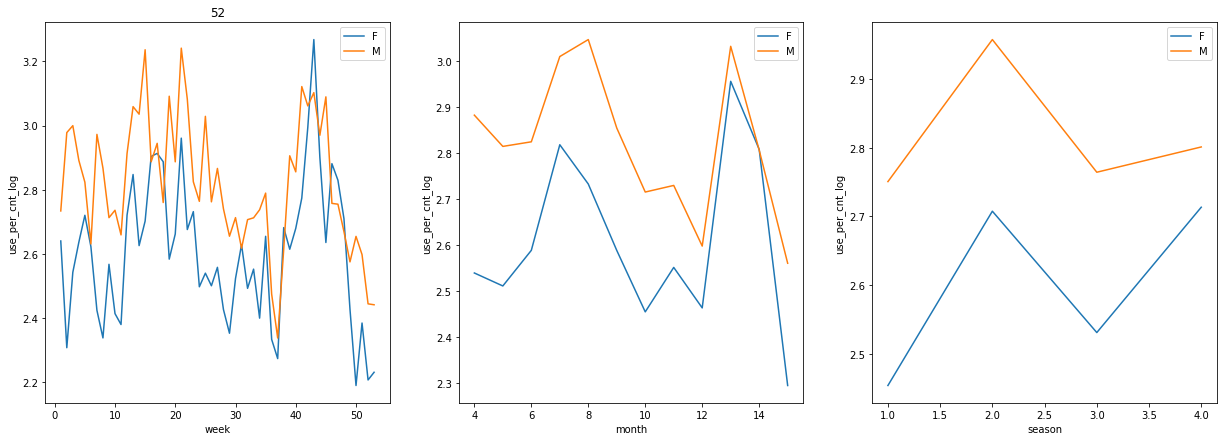

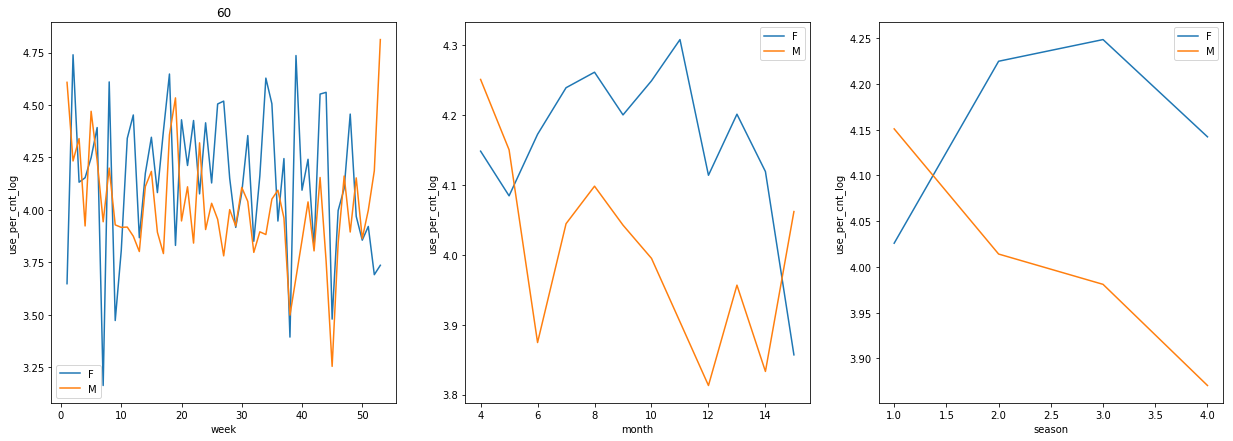

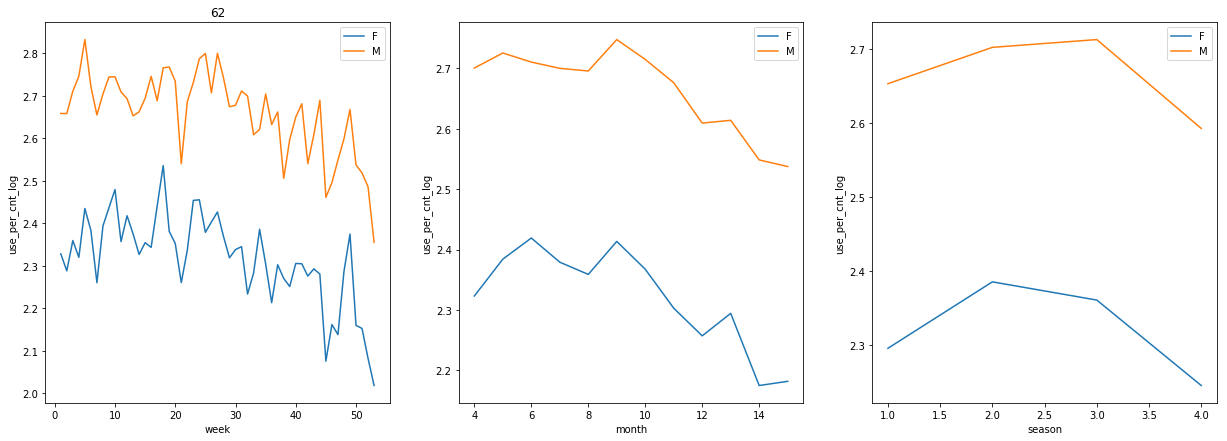

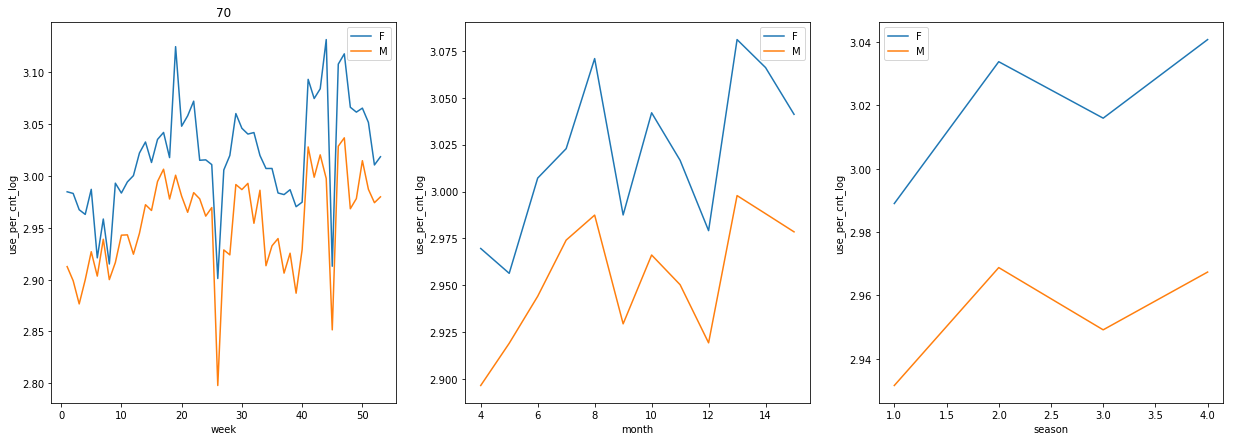

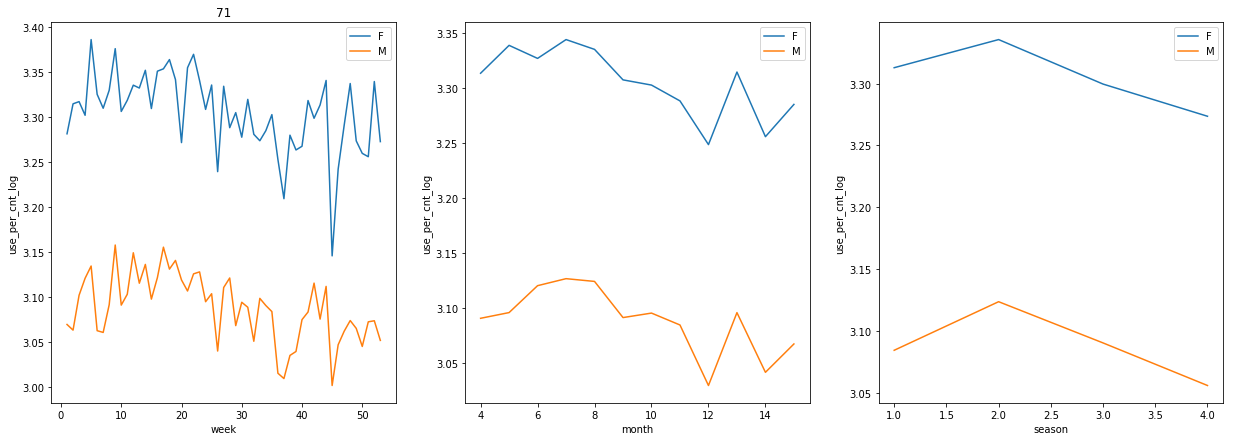

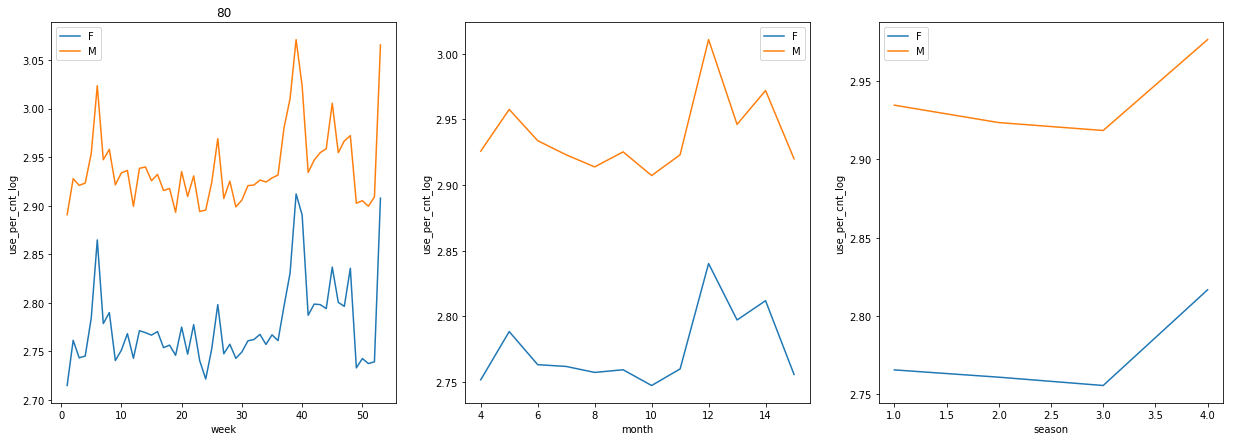

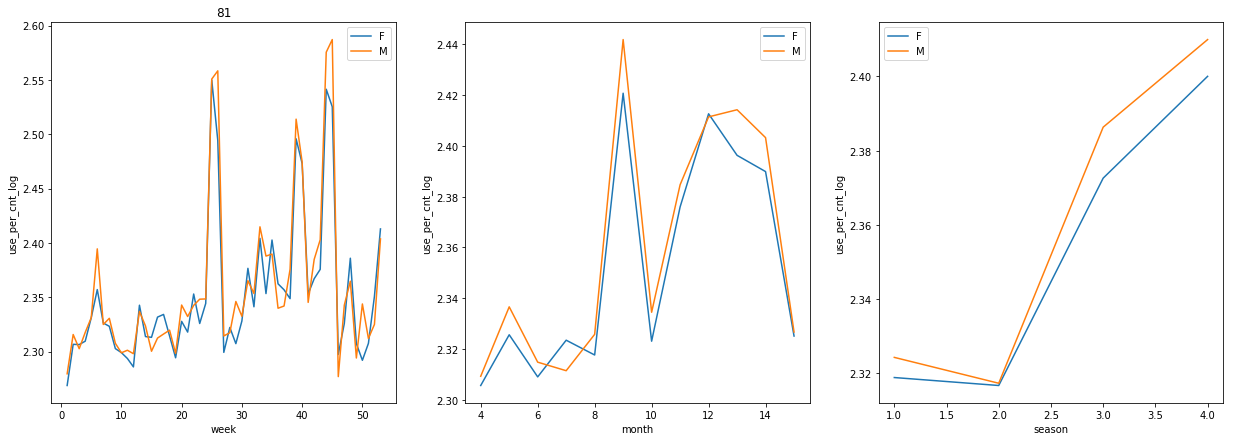

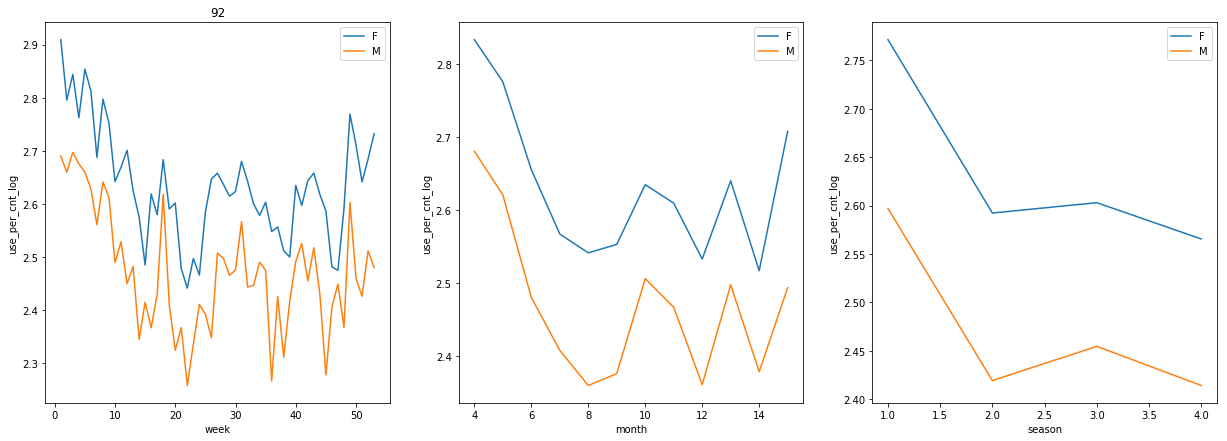

In [53]:
## 업종에 따른 추이 ; 성별을 동시에 표현
cnt = 0
sex_ = ['F', 'M']
for i in market_index:
    title = market_names[cnt]
    cnt+=1
    fig, ax = plt.subplots(1,3, figsize = (21,7))
    ax[0].title.set_text(i)
    for j in sex_:
        exec("tmp%s = card_spend_copy[card_spend_copy['SEX_CD'] == '%s']" % (j,j))

        exec("%s_wk = tmp%s[tmp%s['MCT_CAT_CD'] == i].groupby('week').mean().use_per_cnt_log" % (j,j,j))
        exec("week_indx = %s_wk.index" % j)
        exec("%s_mth = tmp%s[tmp%s['MCT_CAT_CD'] == i].groupby('month').mean().use_per_cnt_log" % (j,j,j))
        exec("month_indx = %s_mth.index" % j)
        exec("%s_season = tmp%s[tmp%s['MCT_CAT_CD'] == i].groupby('season').mean().use_per_cnt_log" % (j,j,j))
        exec("season_indx = %s_season.index" % j)
        #plot
        exec("sns.lineplot(x = week_indx, y = %s_wk, ax = ax[0])" % j)
        exec("ax[0].legend(sex_)")
        exec("sns.lineplot(x = month_indx, y = %s_mth, ax = ax[1])" % j)
        exec("ax[1].legend(sex_)")
        exec("sns.lineplot(x = season_indx, y = %s_season, ax = ax[2])" % j)
        exec("ax[2].legend(sex_)")

#### 로그스케일 값의 의미

In [51]:
pow(np.exp(1), 0.2) # 1.2배
pow(np.exp(1), 0.41) # 1.5배
pow(np.exp(1), 0.6) # 1.8배
pow(np.exp(1), 0.7) # 2 배

1.2214027581601699

1.5068177851128535

1.8221188003905089

2.013752707470476

#### 업종별 박스플롯 (weekly, monthly, seasonal)

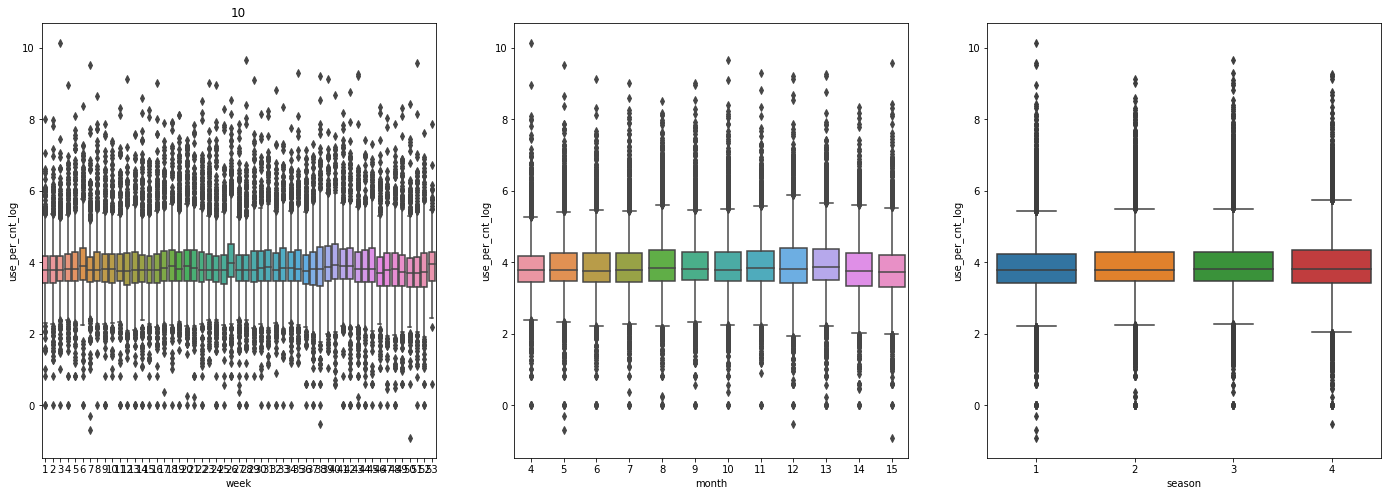

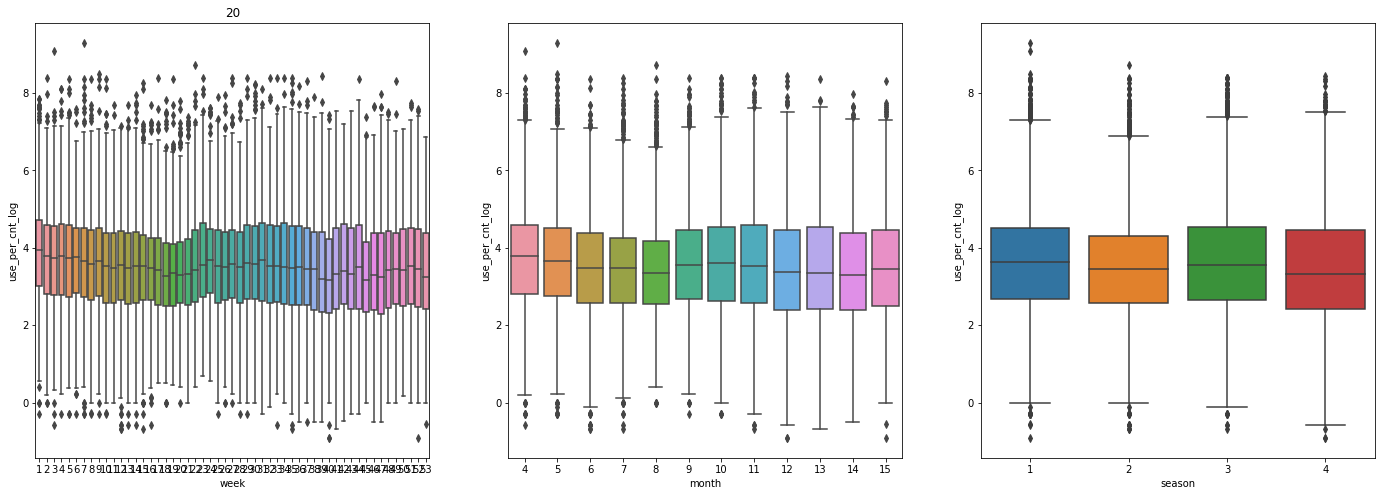

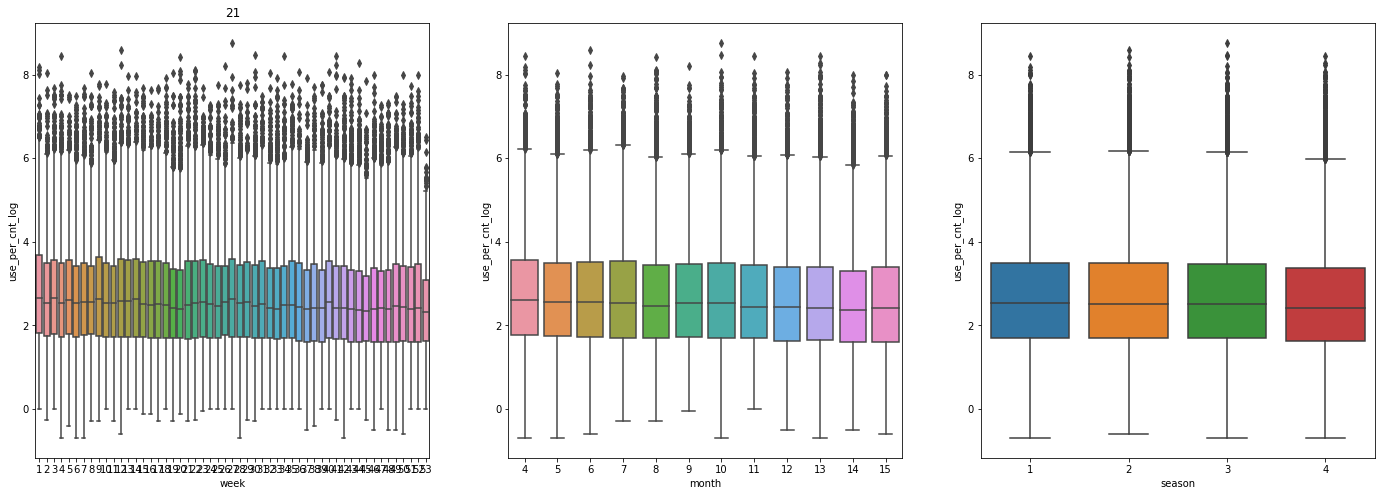

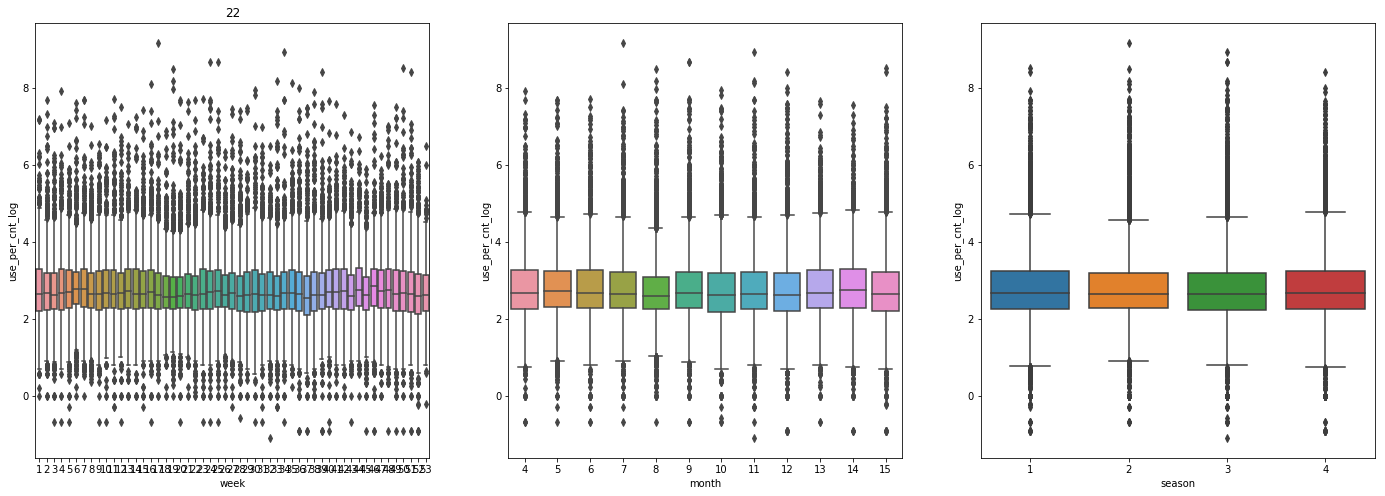

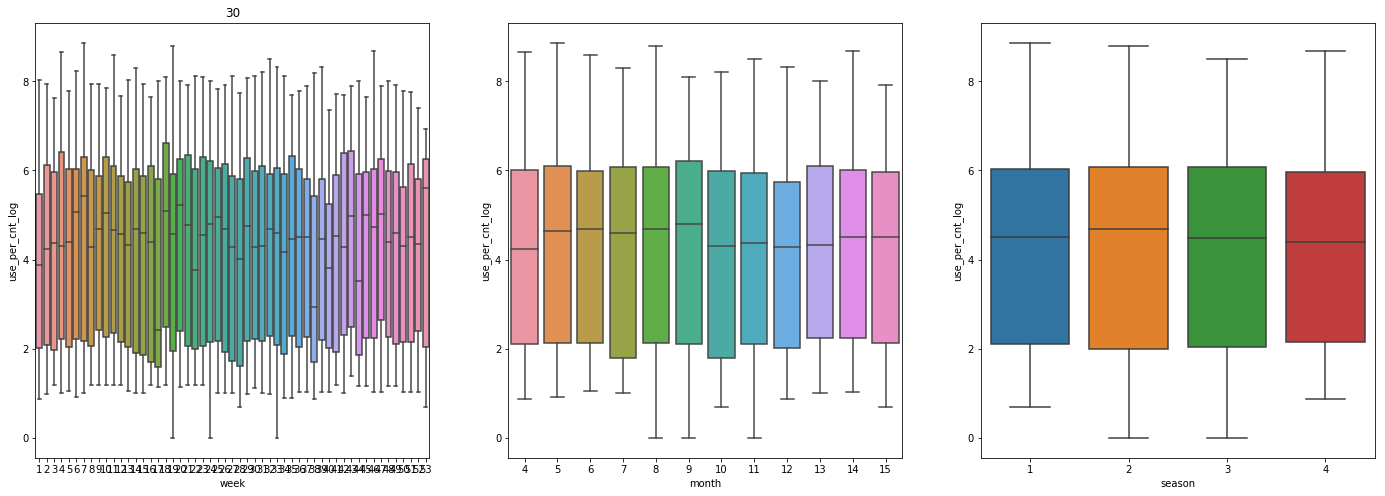

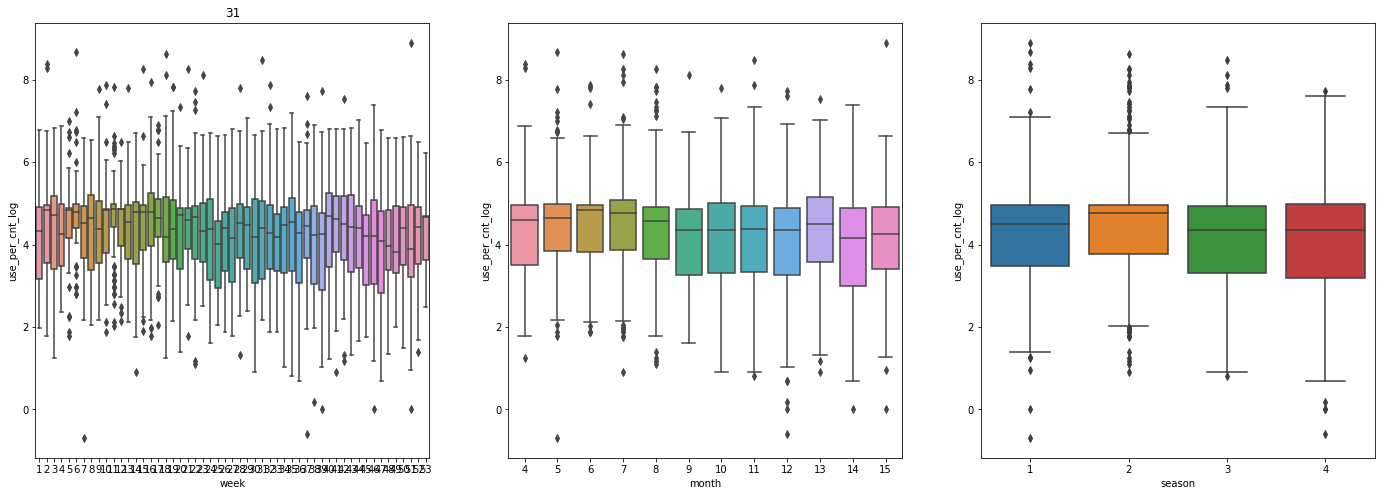

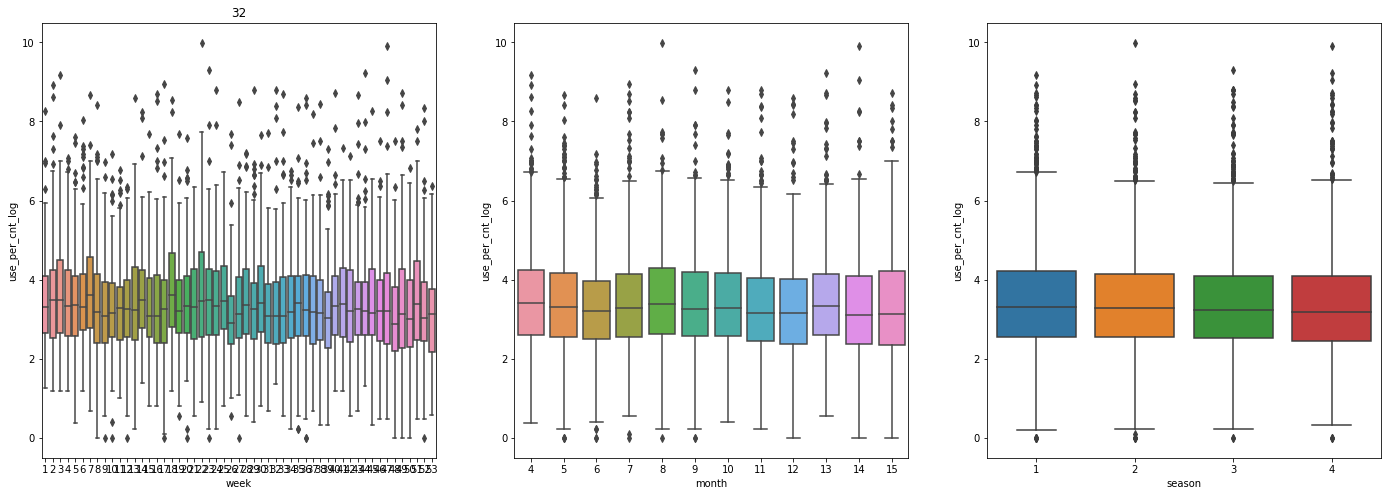

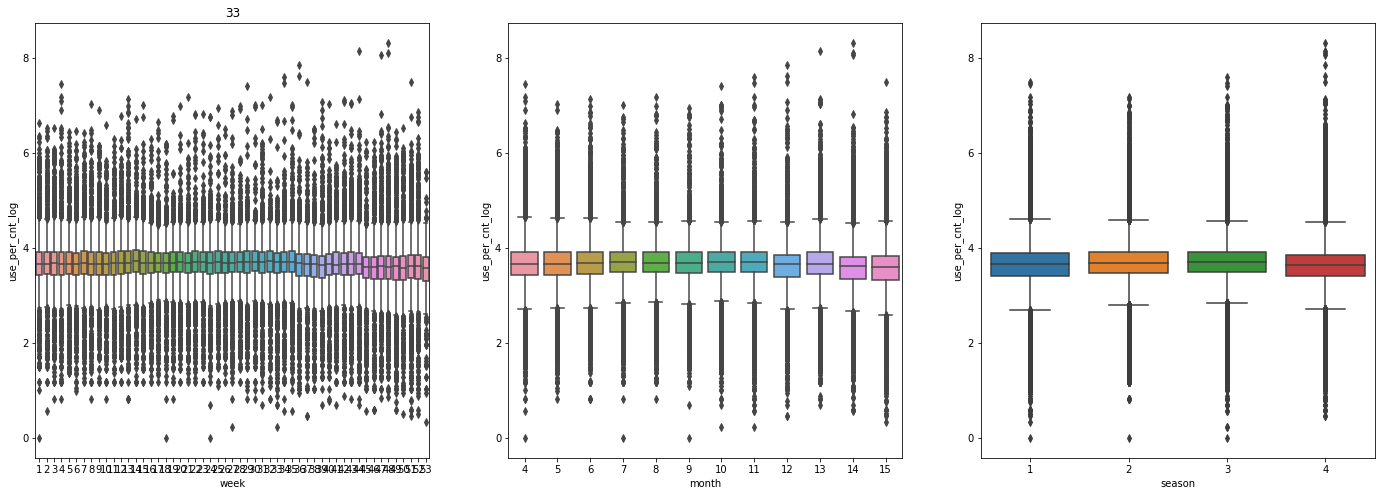

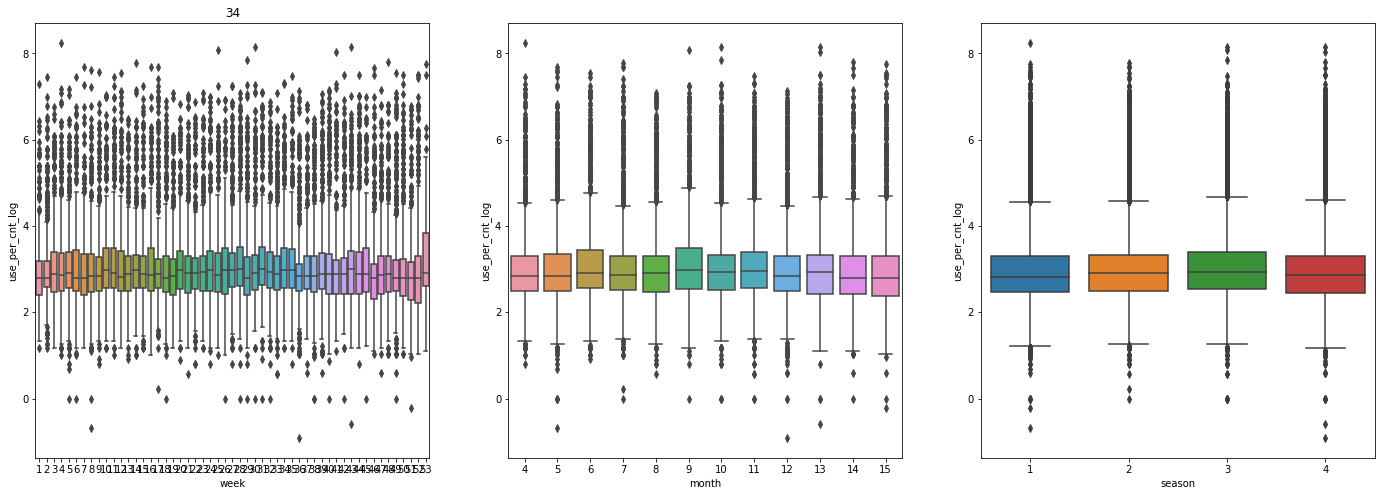

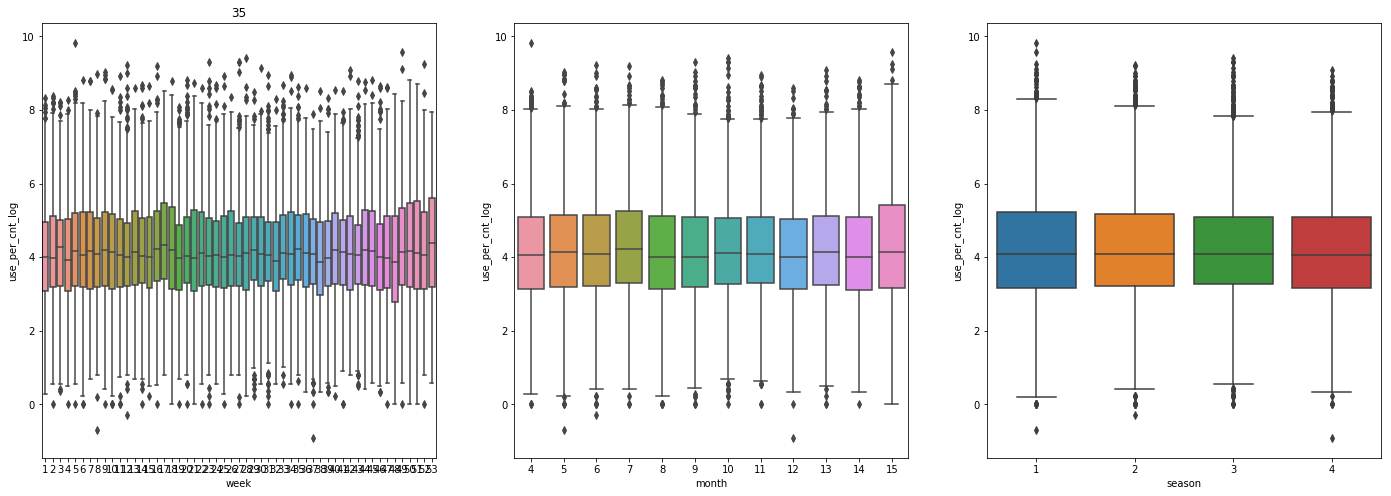

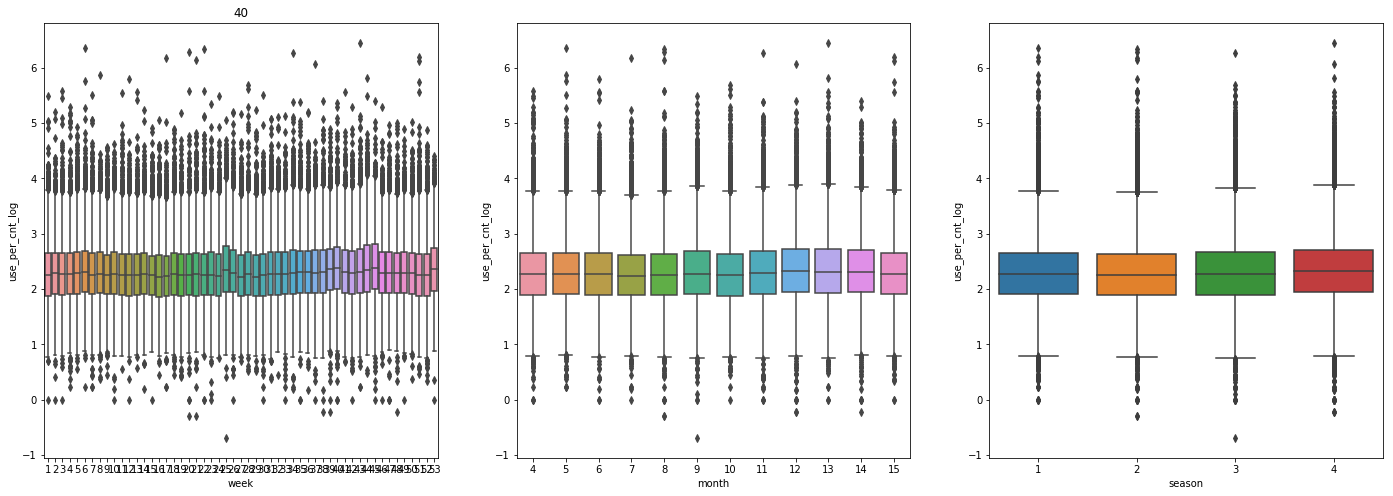

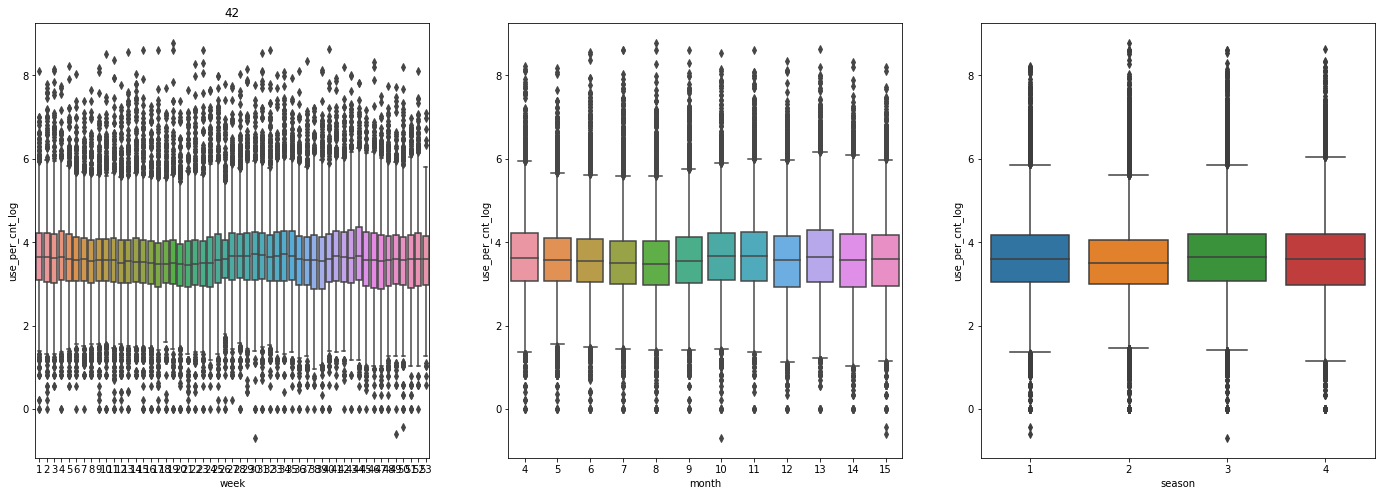

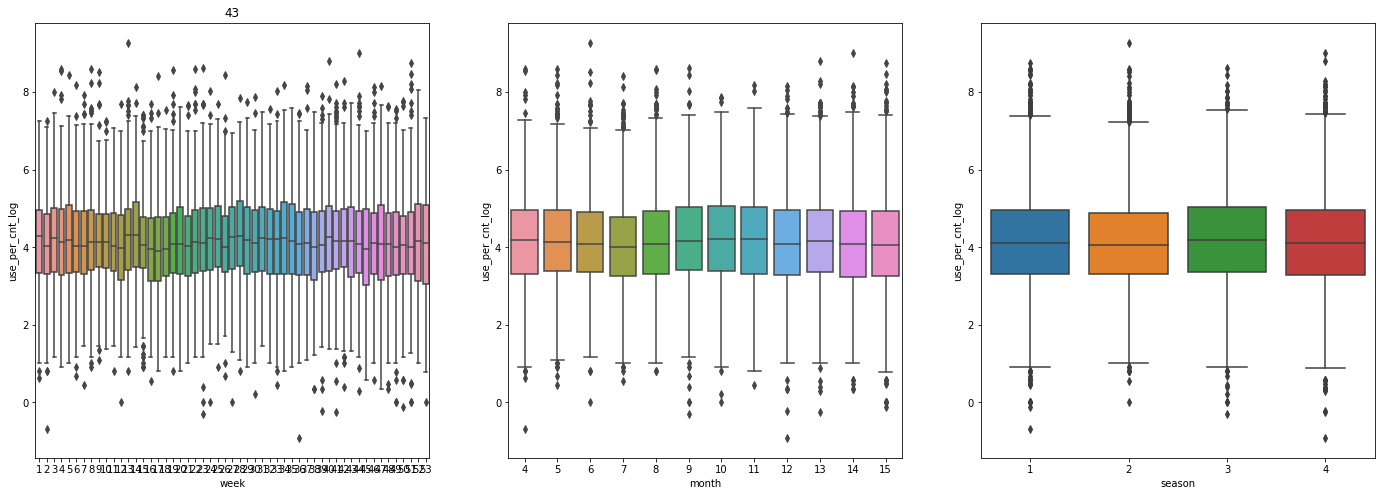

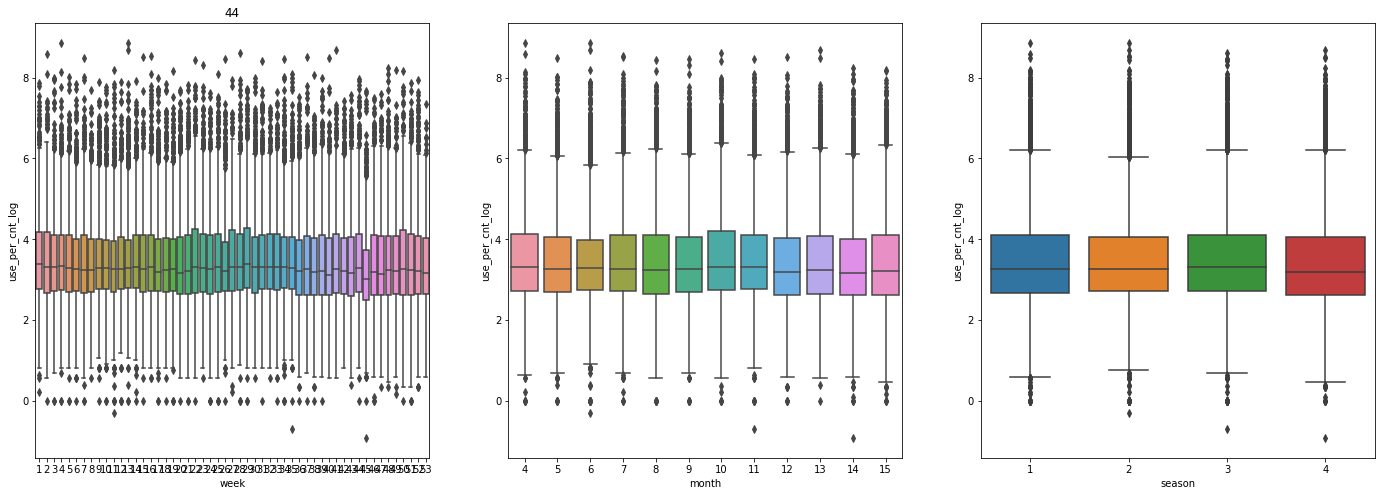

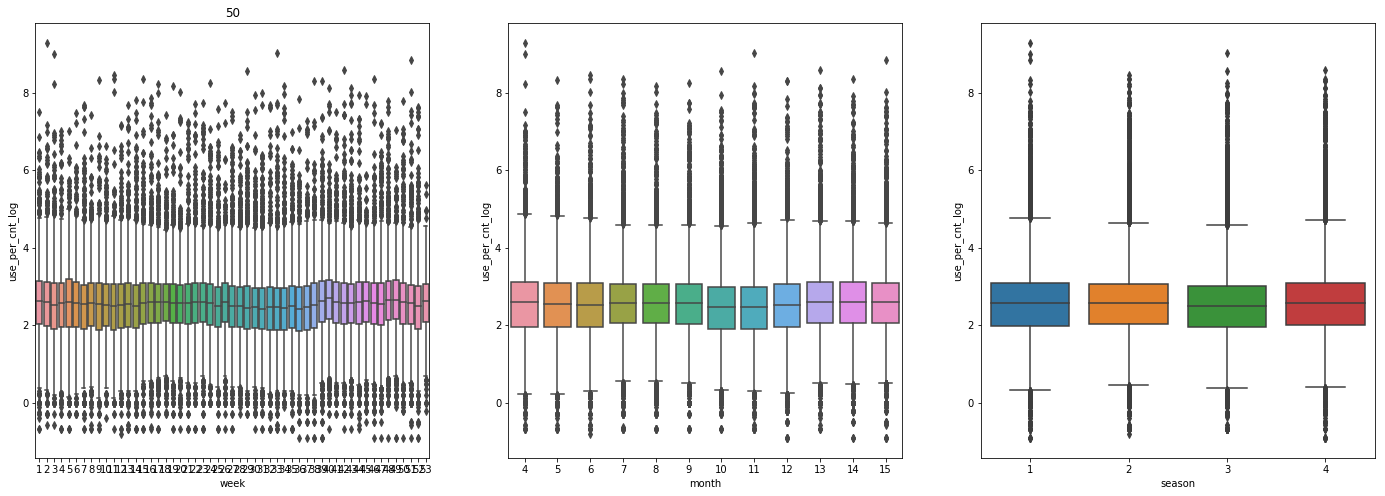

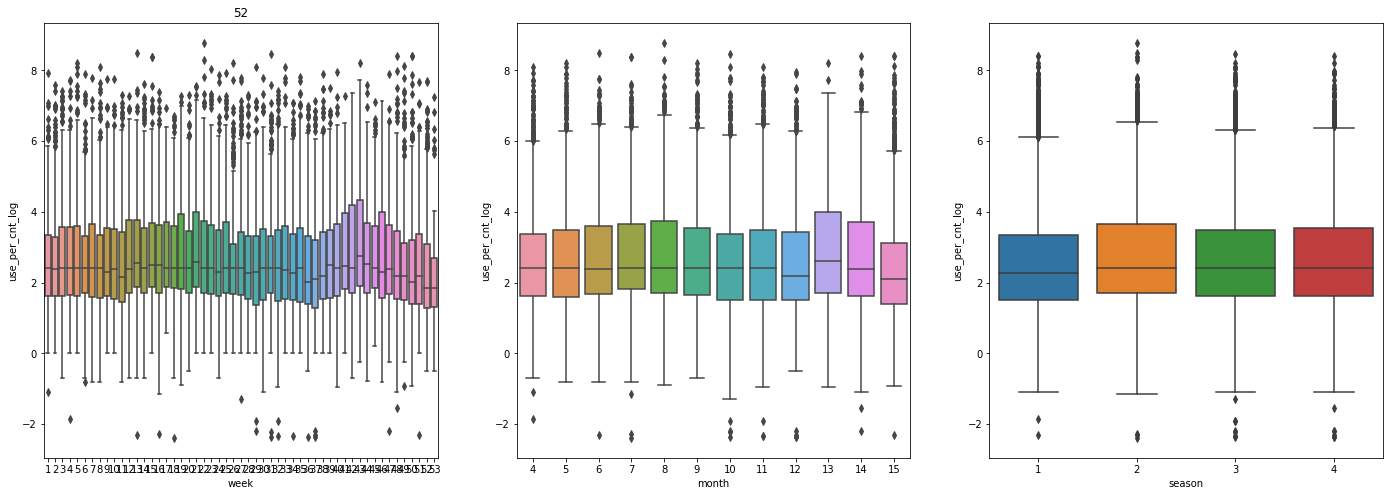

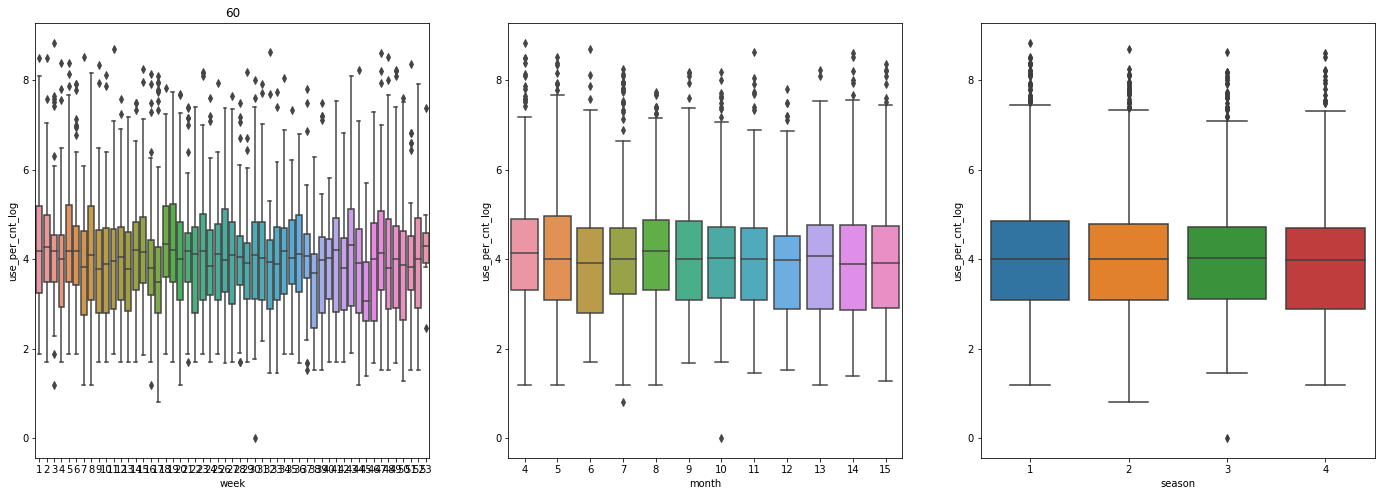

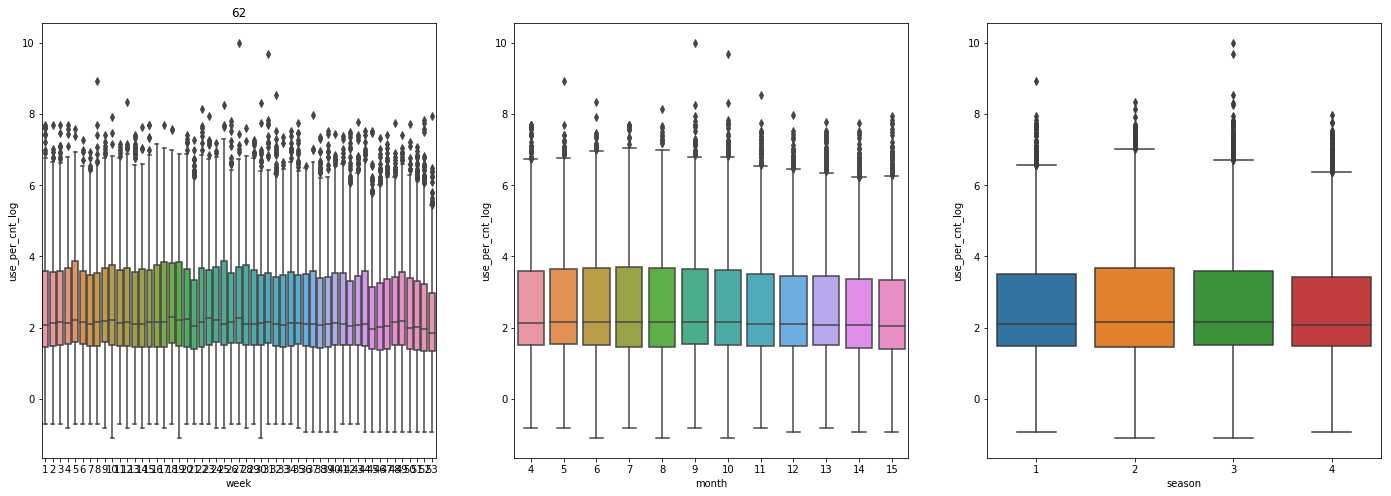

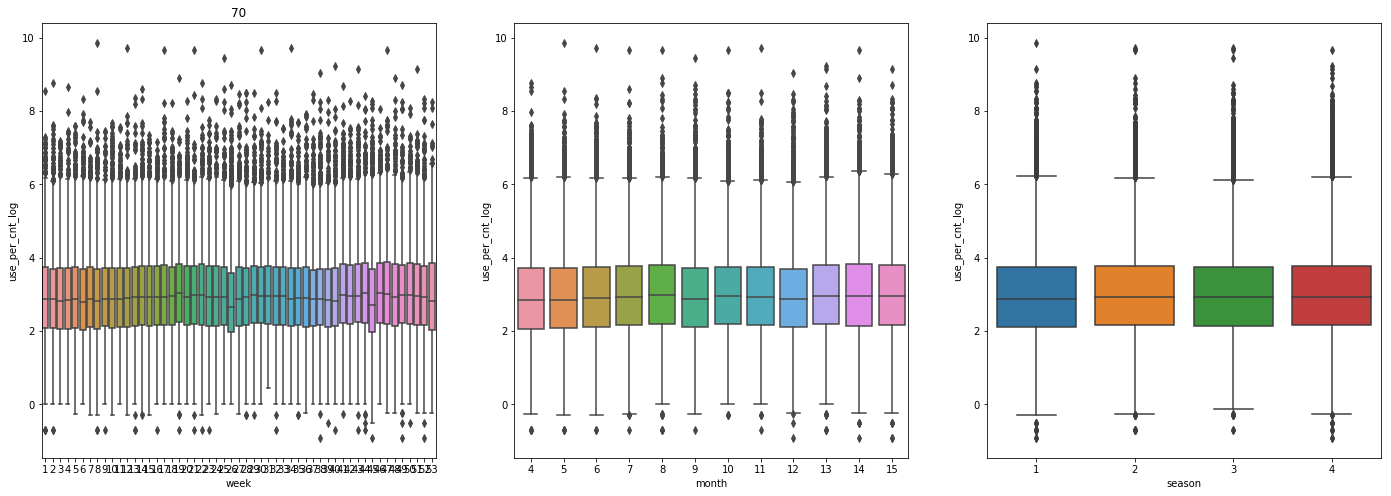

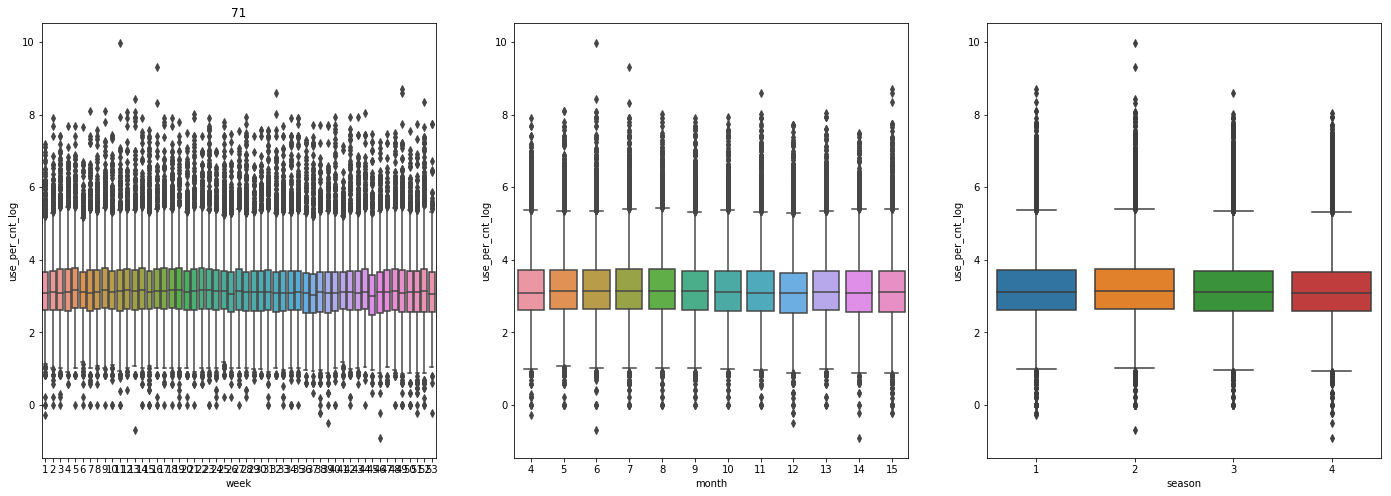

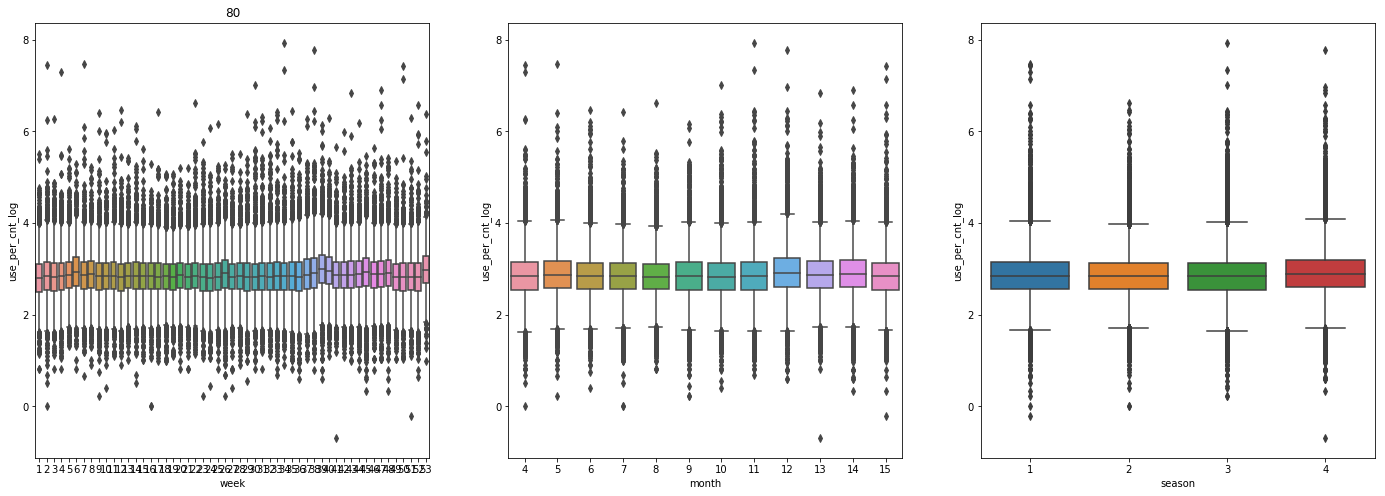

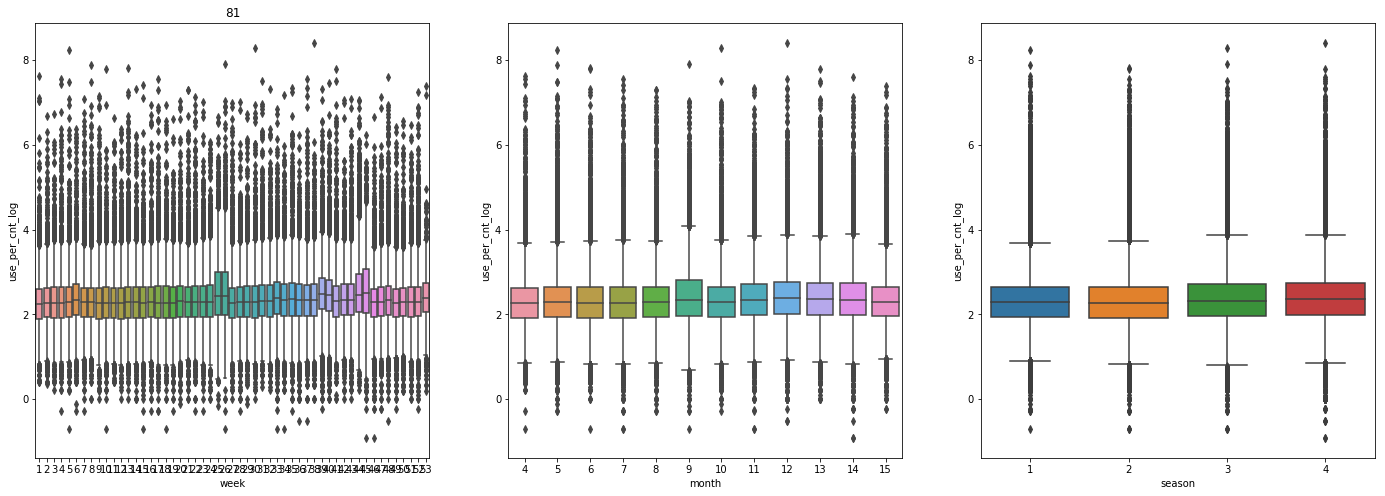

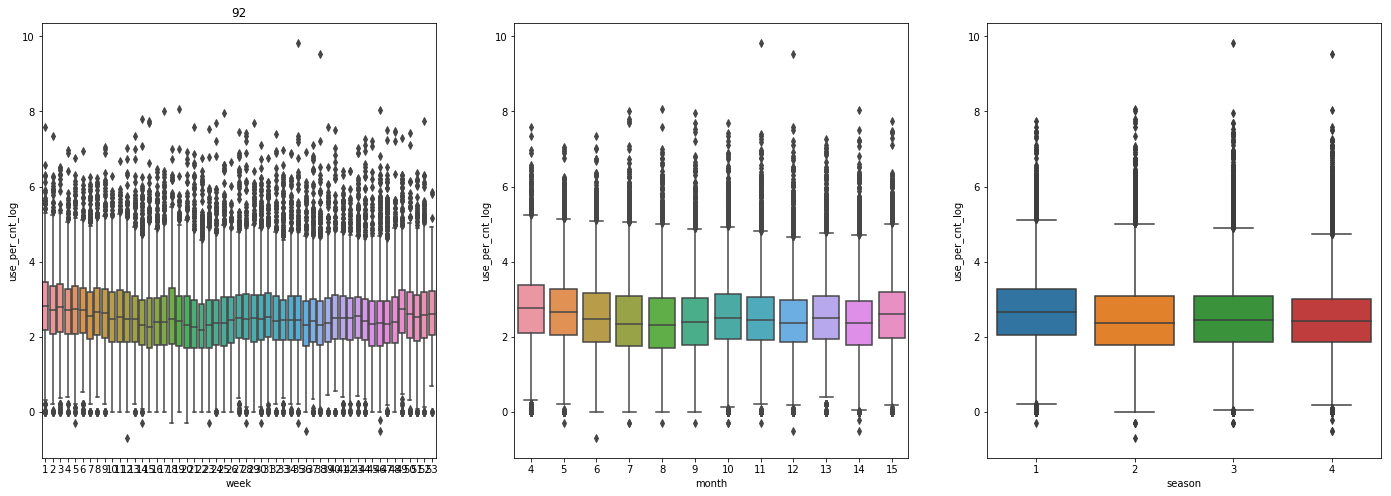

In [52]:
cnt = 0
for i in market_index:
    title = market_names[cnt]
    cnt+=1
    var1 = 'week'; var2 = 'month'; var3 = 'season'; 
    exec("MCT_%d = card_spend_copy[card_spend_copy['MCT_CAT_CD'] == %d]" % (i,i) ) 
    exec("data1 = pd.concat([MCT_%d['use_per_cnt_log'], MCT_%d[var1]], axis=1)" % (i,i))
    exec("data2 = pd.concat([MCT_%d['use_per_cnt_log'], MCT_%d[var2]], axis=1)" % (i,i))
    exec("data3 = pd.concat([MCT_%d['use_per_cnt_log'], MCT_%d[var3]], axis=1)" % (i,i))
    f, ax = plt.subplots(1,3, figsize=(24,8))
    ax[0].title.set_text(i)
    exec("sns.boxplot(x=var1, y='use_per_cnt_log', data=data1, ax = ax[0])")
    exec("sns.boxplot(x=var2, y='use_per_cnt_log', data=data2, ax =ax[1])")
    exec("sns.boxplot(x=var3, y='use_per_cnt_log', data=data3, ax = ax[2])")
#fig.axis(ymin=0, ymax=30000);

#### 3.3. 나이에 대한 건당소비액

array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65], dtype=int64)

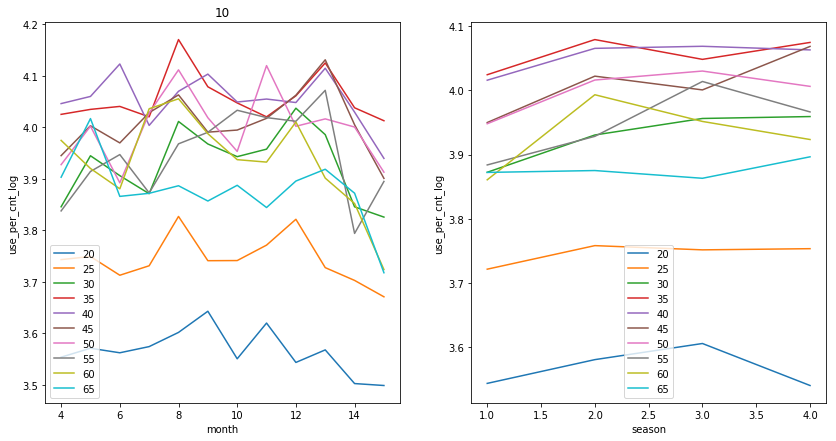

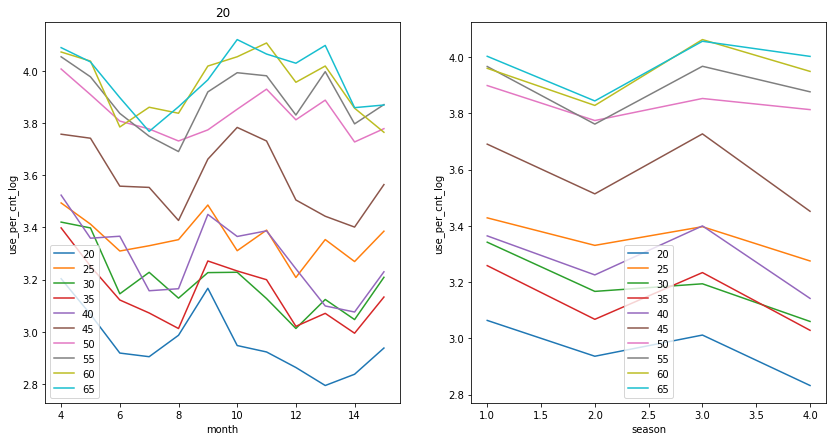

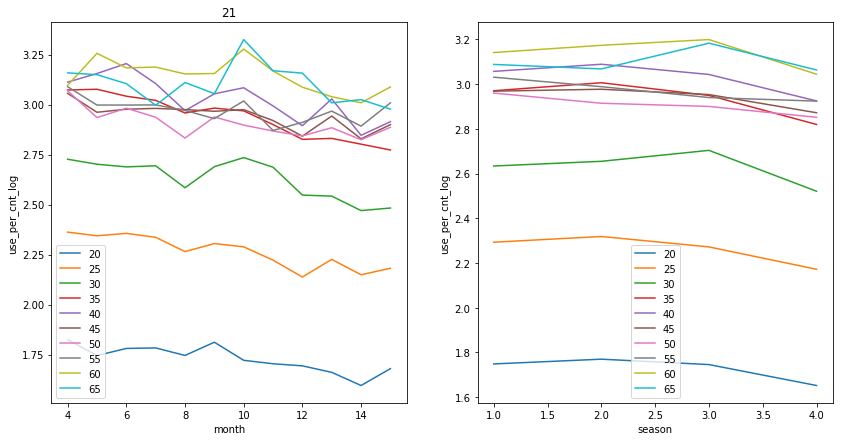

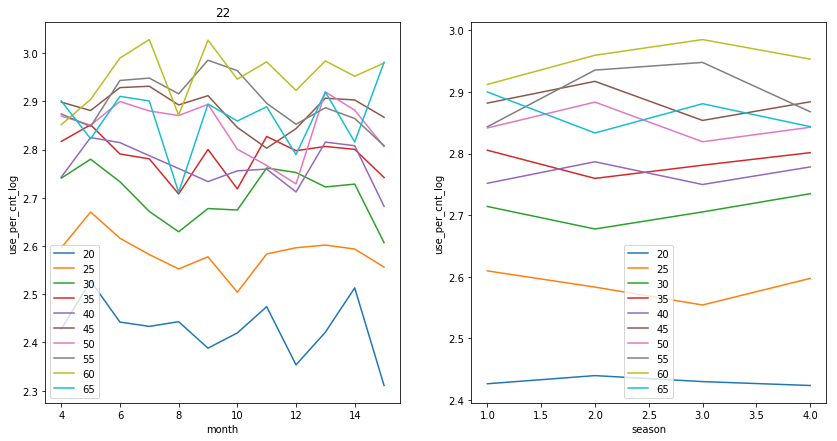

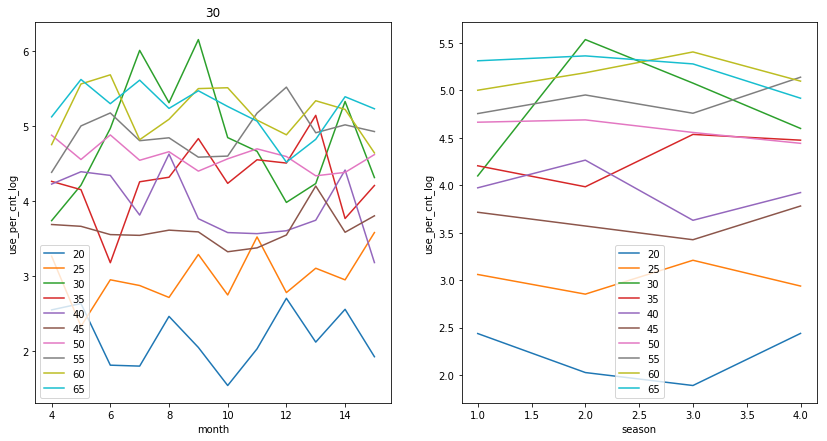

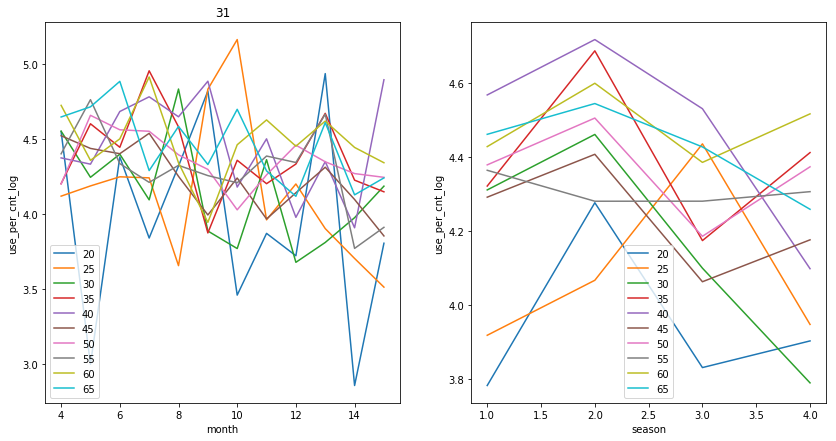

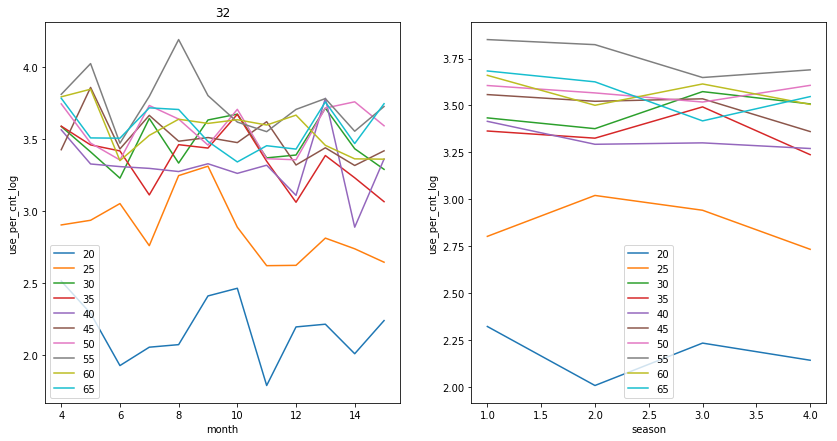

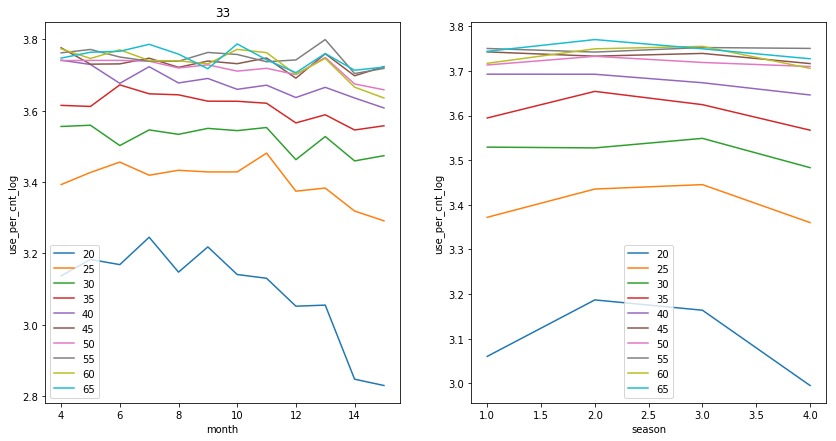

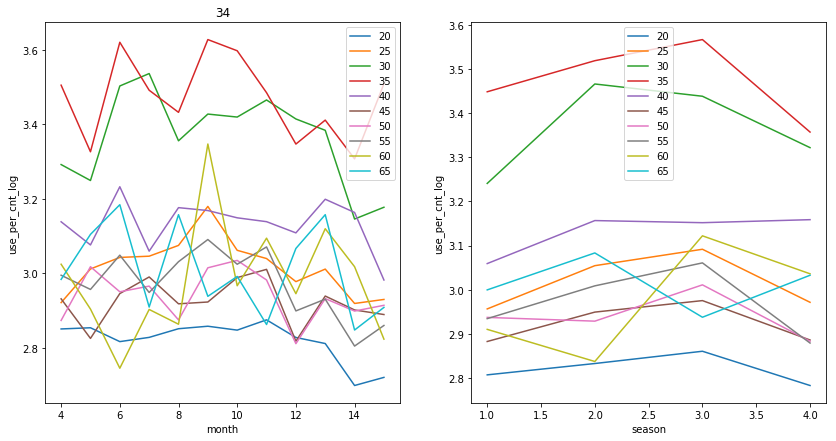

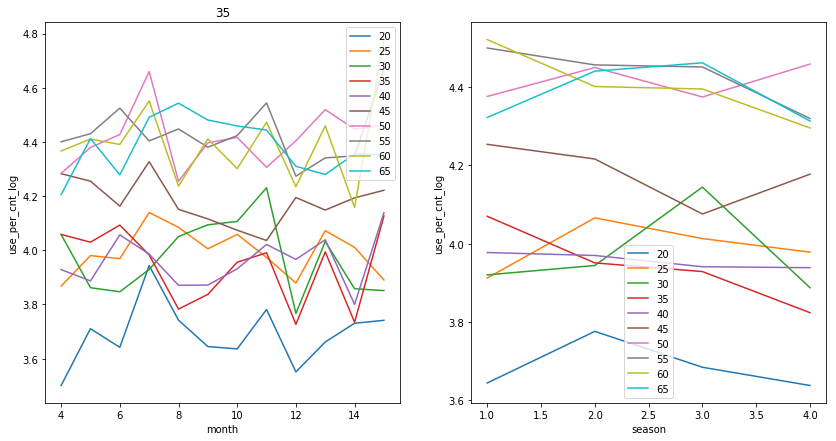

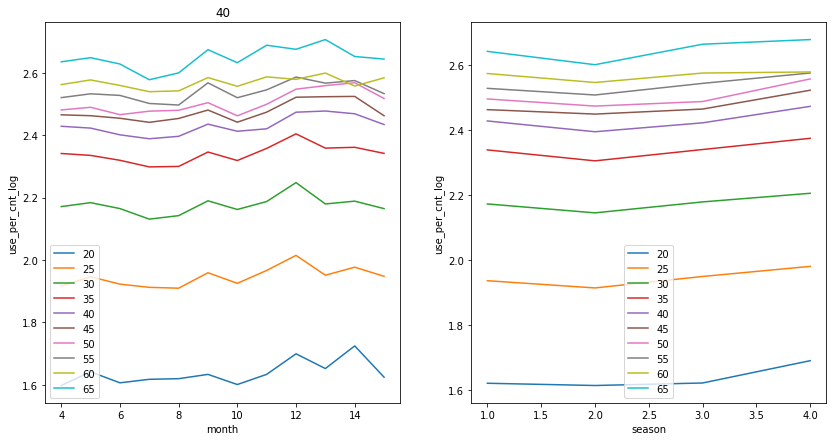

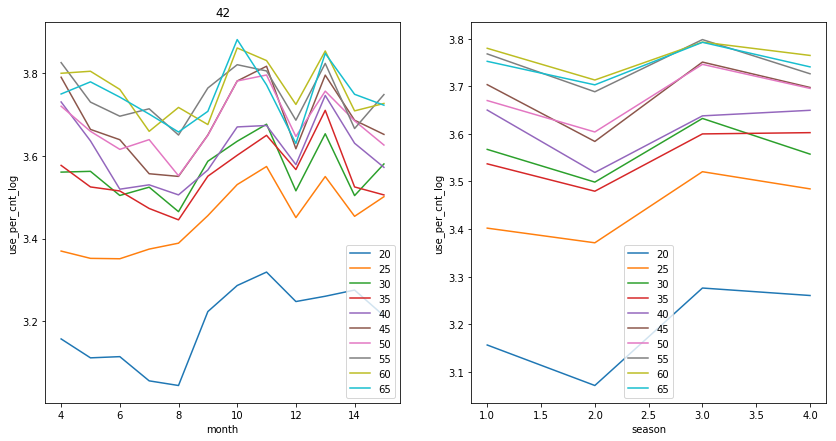

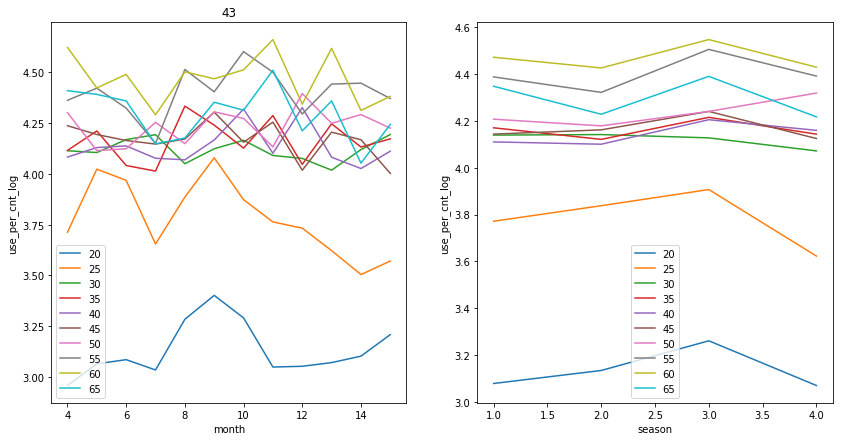

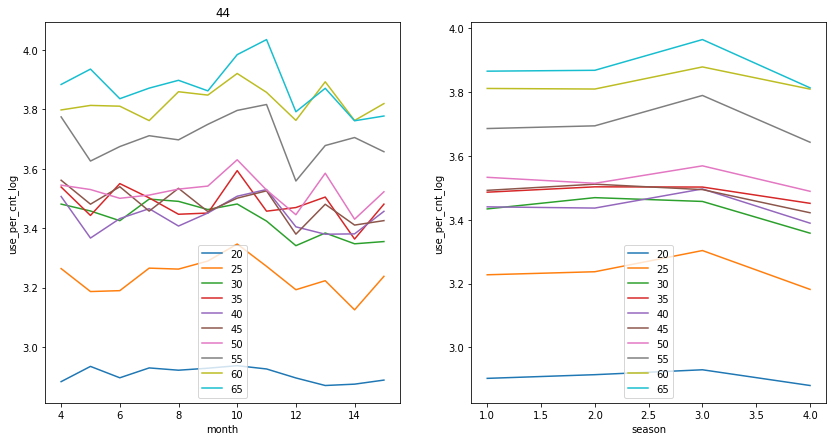

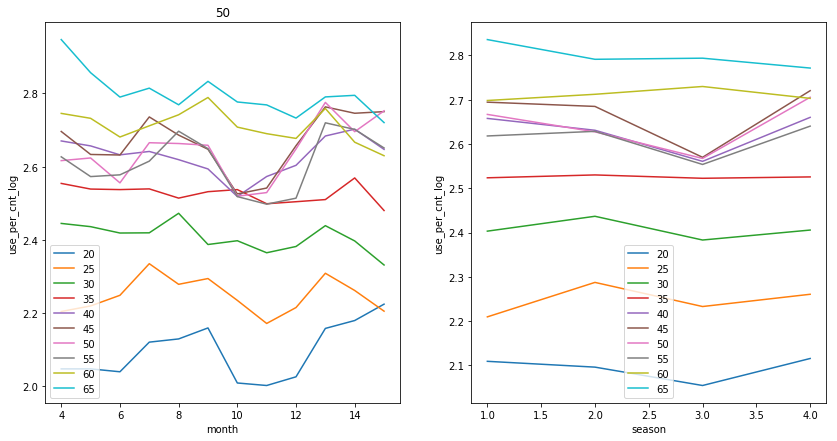

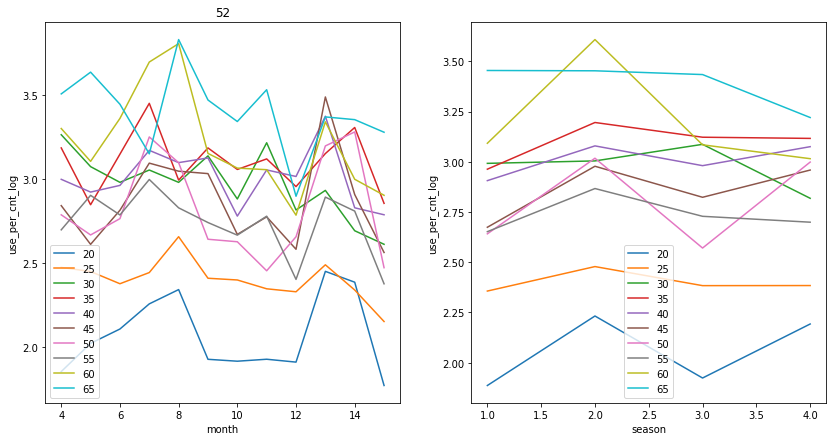

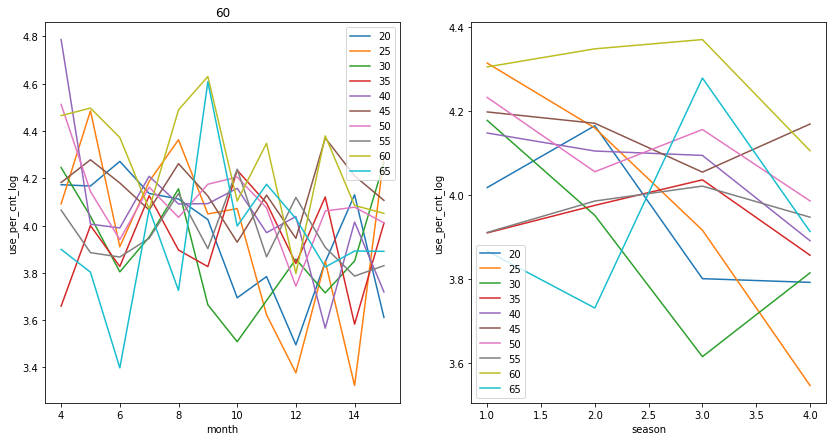

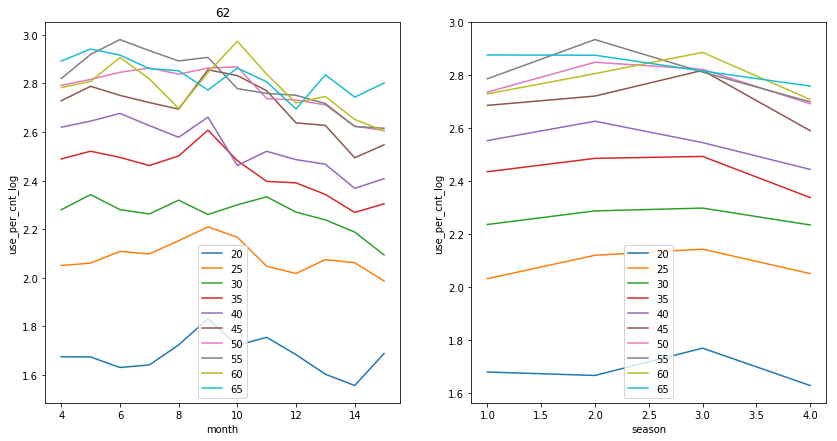

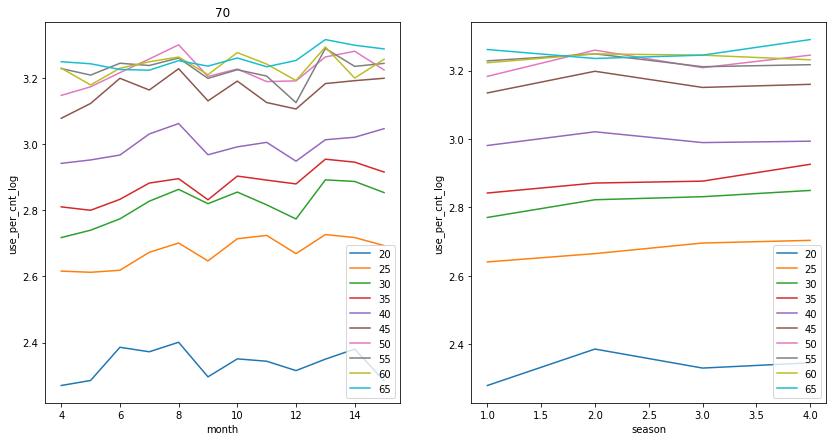

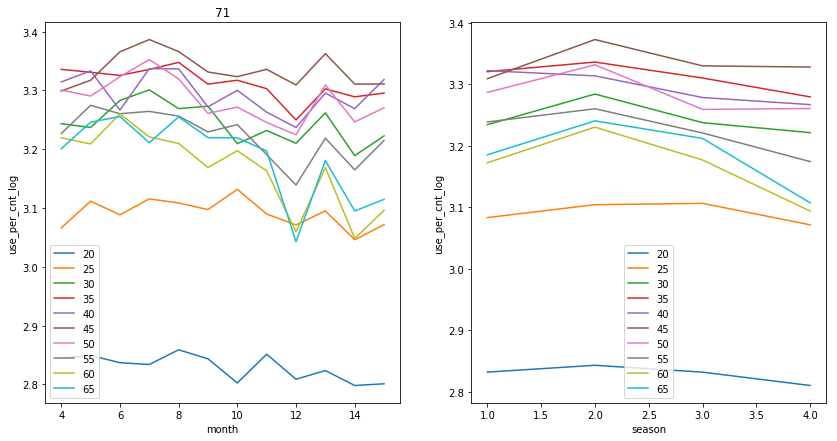

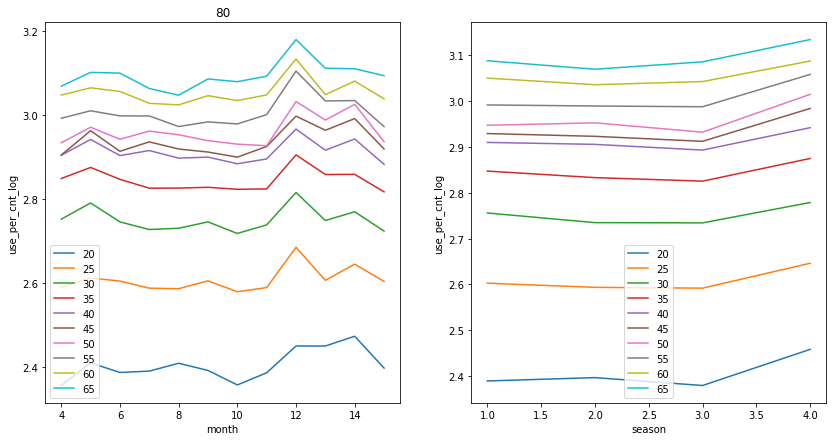

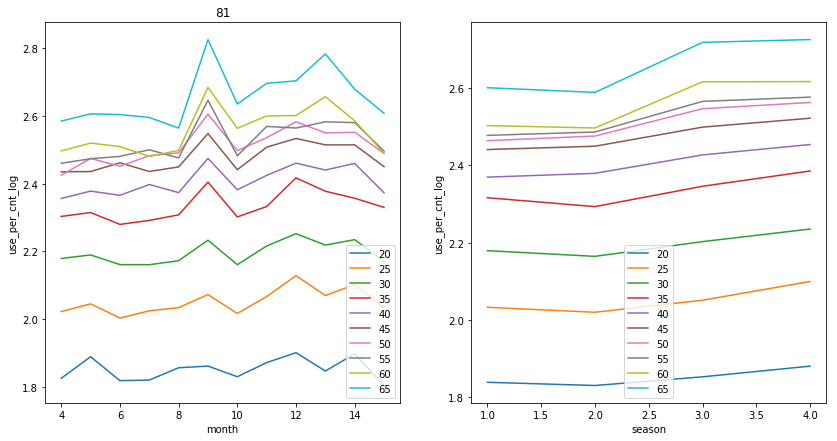

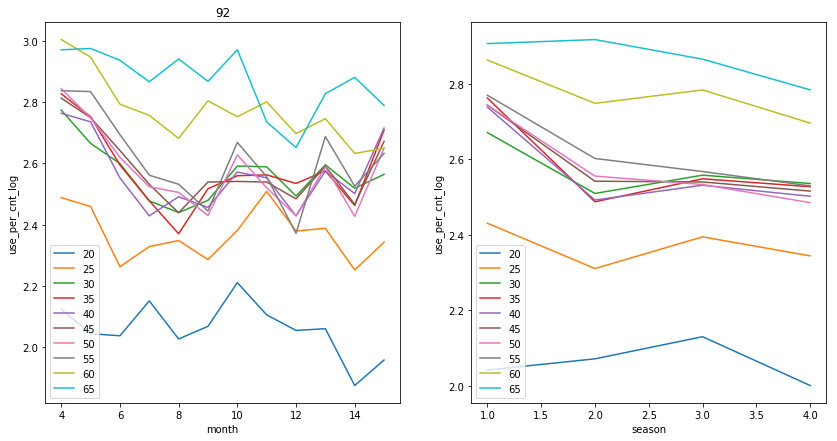

In [53]:
age_index = card_spend_copy.AGE_CD.unique()
age_index.sort(); age_index
cnt = 0
# 나중에 클래스로 만들어서 keyword argument 넣으면 나오게끔 해봐야겠다 ㅇ차피 반복적이니
for i in market_index:
    title = market_names[cnt]
    cnt+=1
    fig, ax = plt.subplots(1,2, figsize = (14,7))
    ax[0].title.set_text(i)
    for j in age_index:
        # creation
        exec("tmp%d = card_spend_copy[card_spend_copy['AGE_CD'] == %d]" % (j,j) ) 
        #weekly로 보니 너무 지저분.. 계절로 보자
        #exec("age_wk%d = tmp%d[tmp%d['MCT_CAT_CD'] == %d].groupby('week').mean().use_per_cnt_log" % (j,j,j,i) )
        #exec("week_indx = age_wk%d.index" % j)
        exec("age_mth%d = tmp%d[tmp%d['MCT_CAT_CD'] == %d].groupby('month').mean().use_per_cnt_log" % (j,j,j,i)) 
        exec("month_indx = age_mth%d.index" % j)
        
        exec("age_season%d = tmp%d[tmp%d['MCT_CAT_CD'] == %d].groupby('season').mean().use_per_cnt_log" % (j,j,j,i)) 
        exec("season_indx = age_season%d.index" % j)
                
        #plot
        exec("sns.lineplot(x = month_indx, y = age_mth%d, ax = ax[0])" % j)
        exec("ax[0].legend(age_index)")
        exec("sns.lineplot(x = season_indx, y = age_season%d, ax = ax[1])" % j)
        exec("ax[1].legend(age_index)")

#### 3.4. 지역에 대한 건당소비액

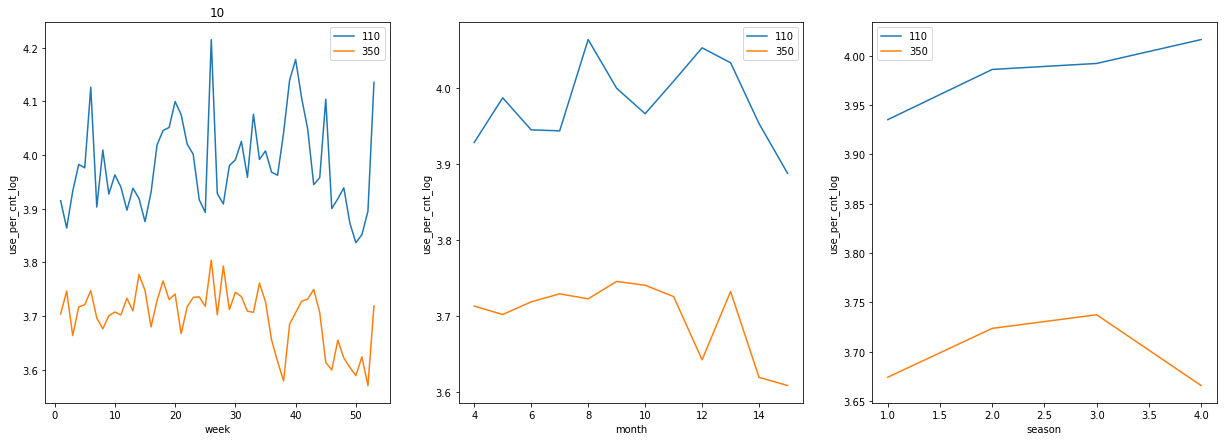

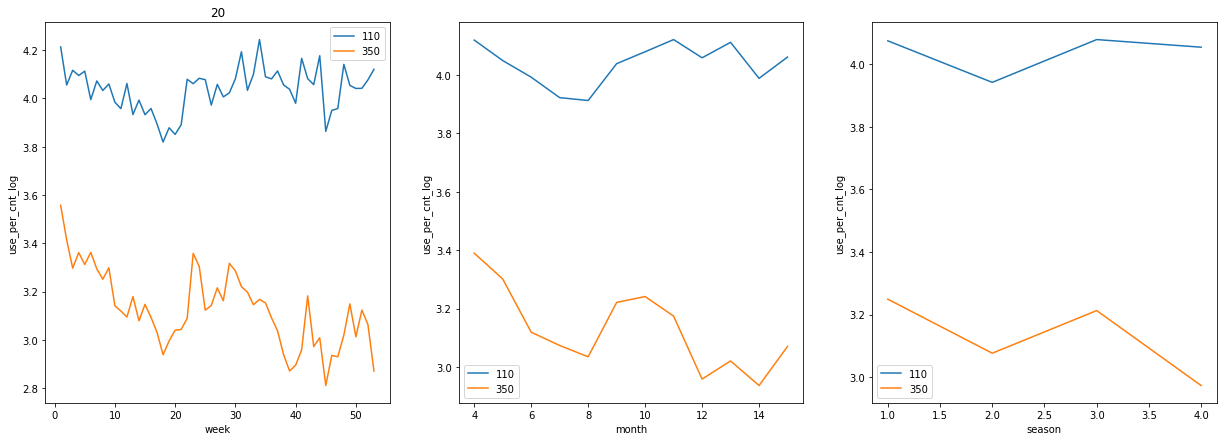

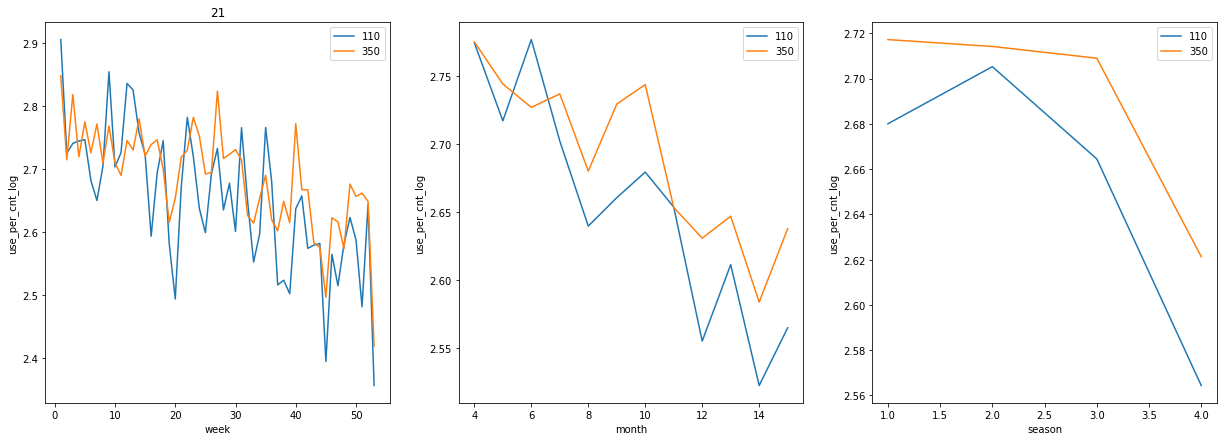

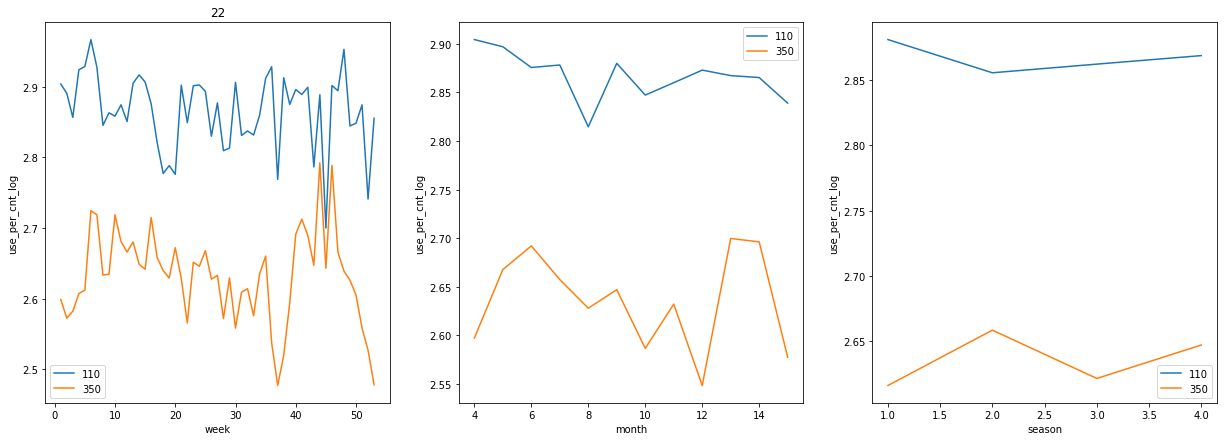

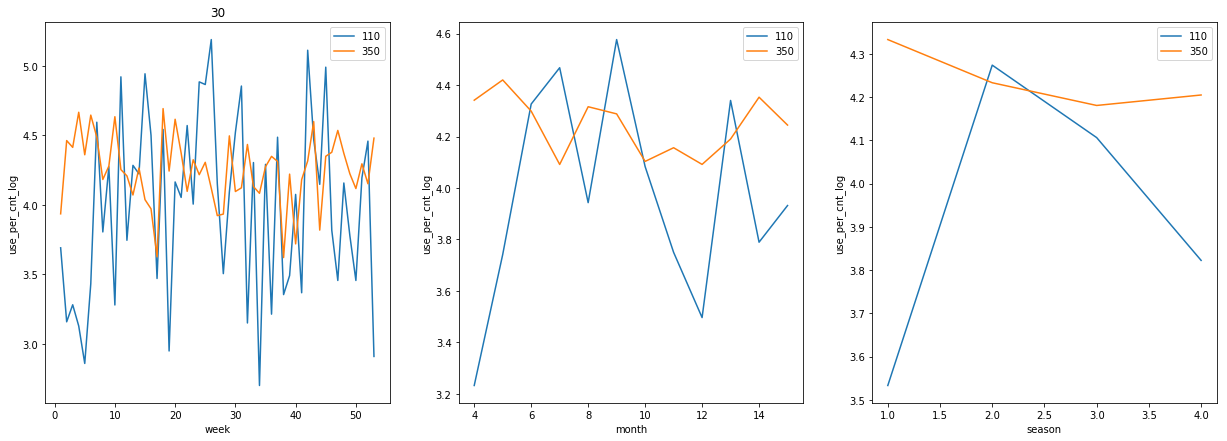

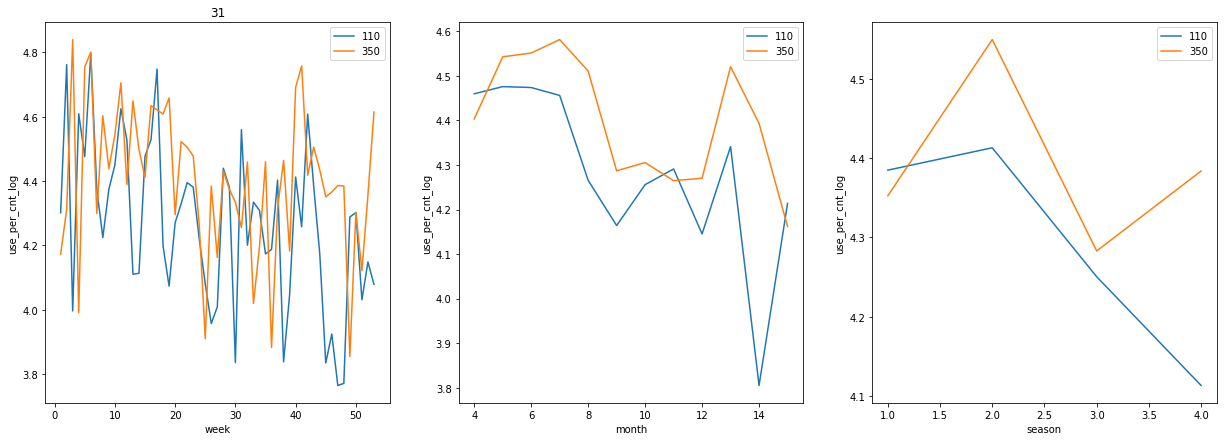

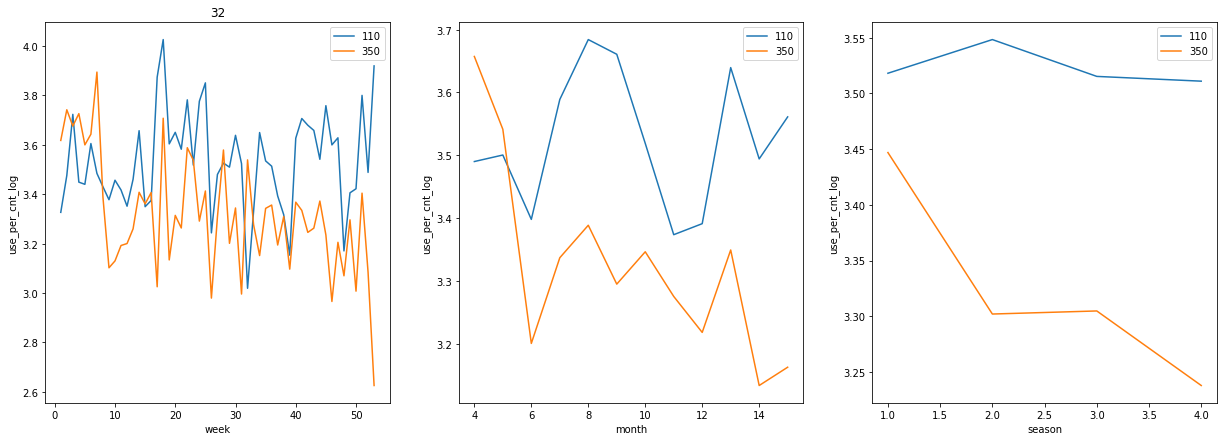

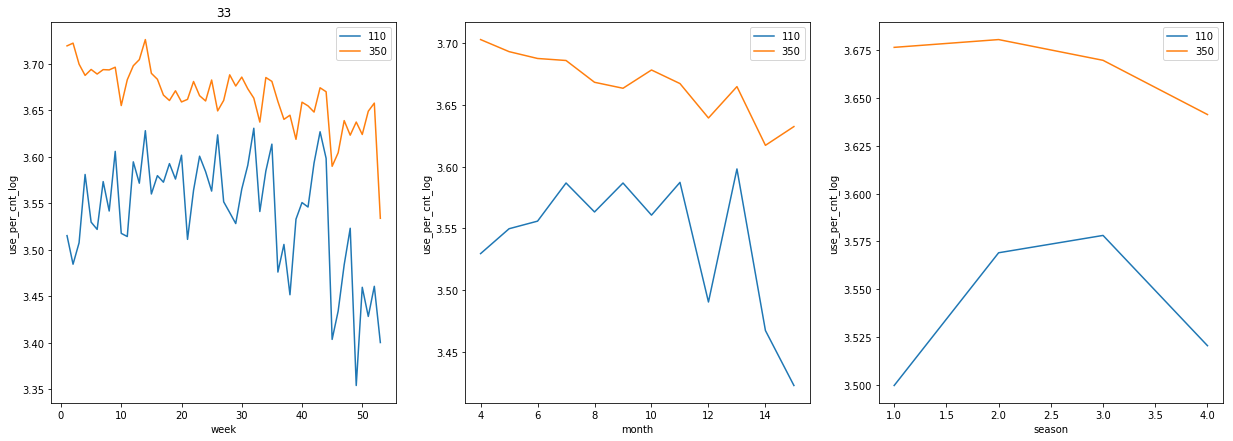

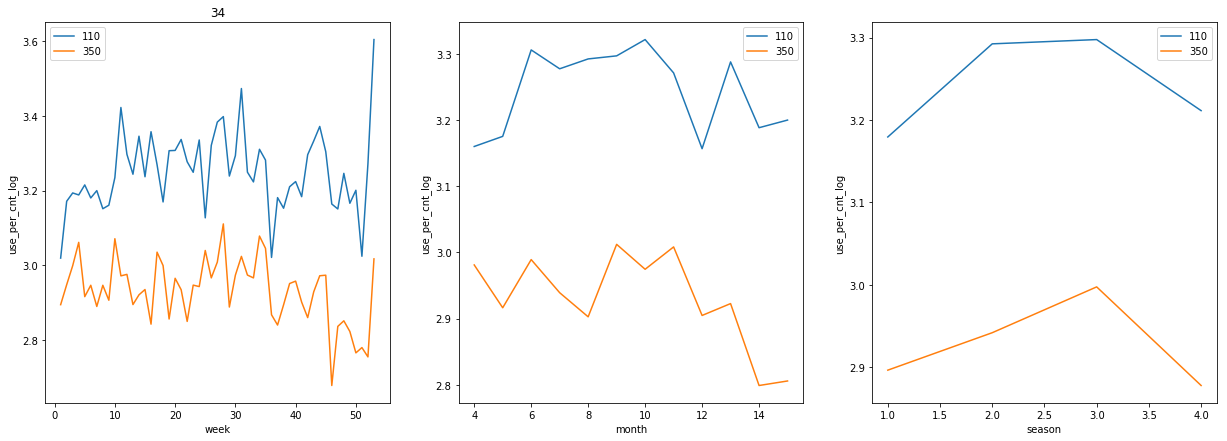

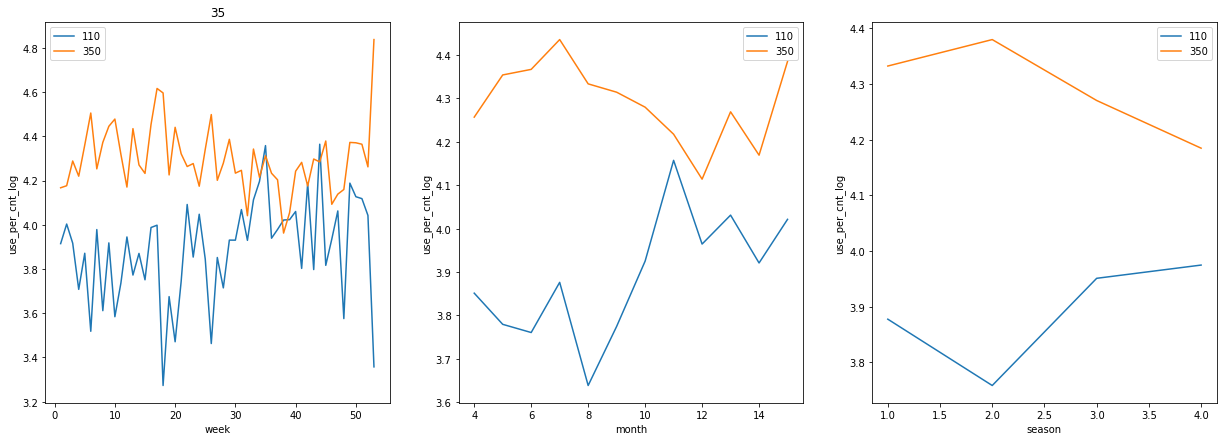

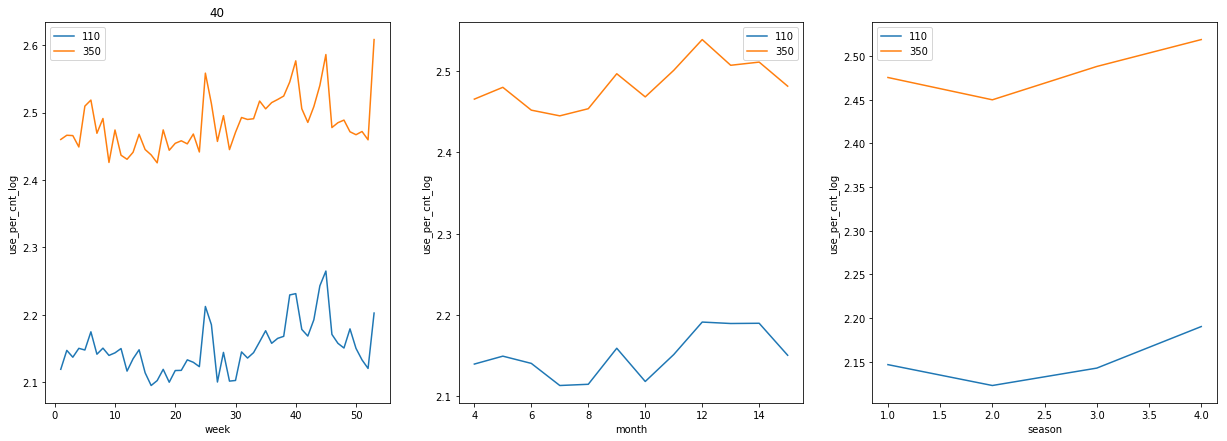

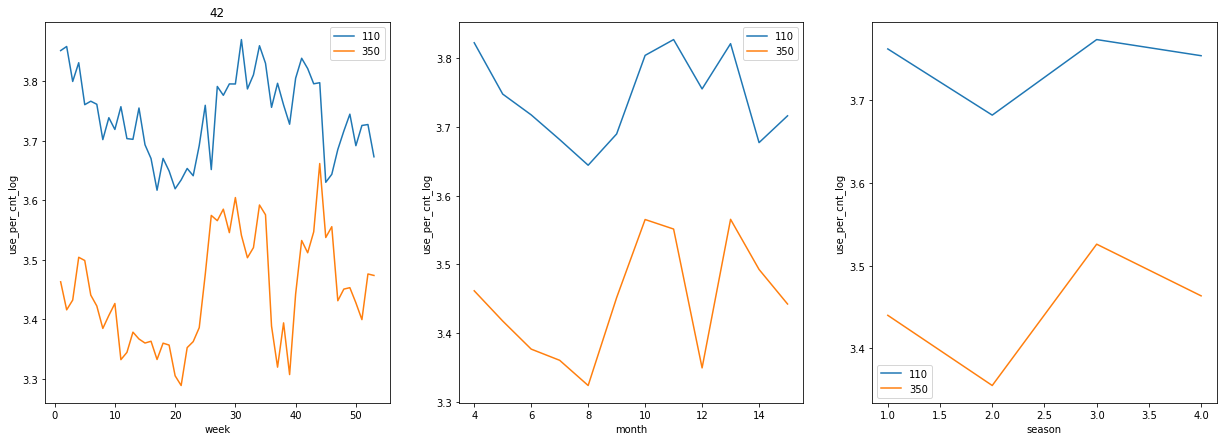

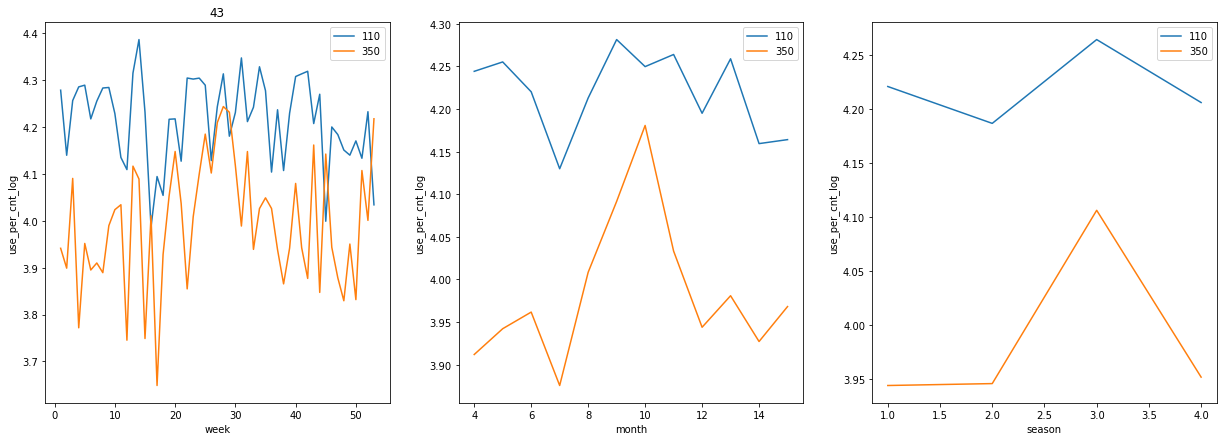

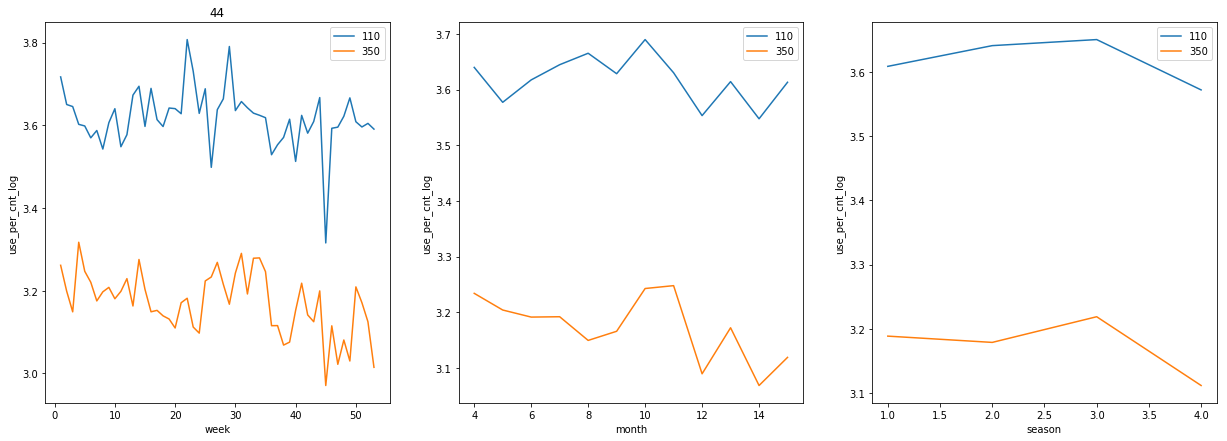

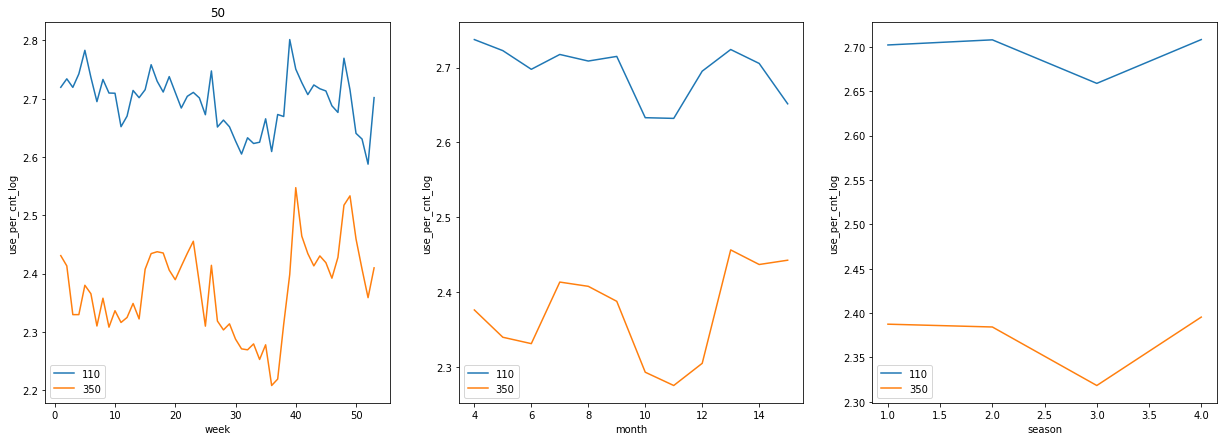

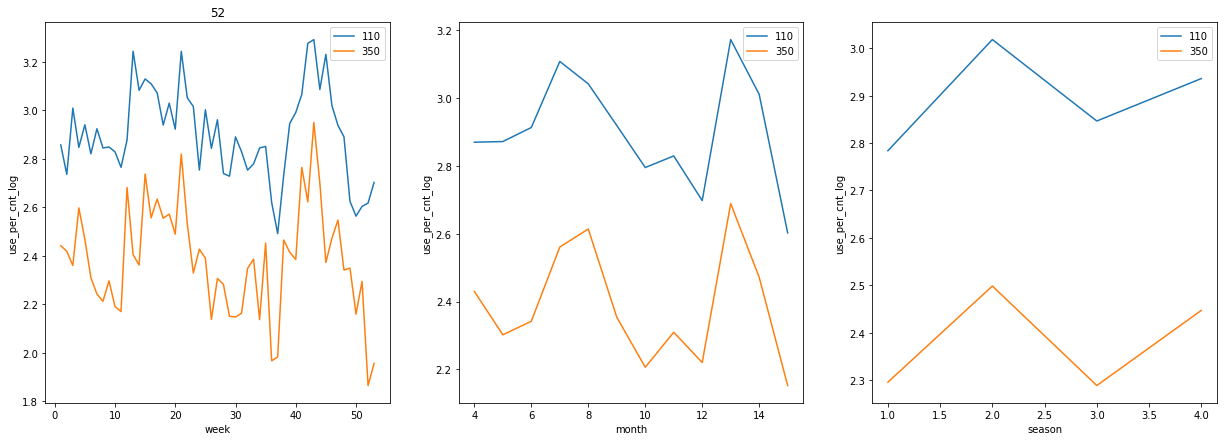

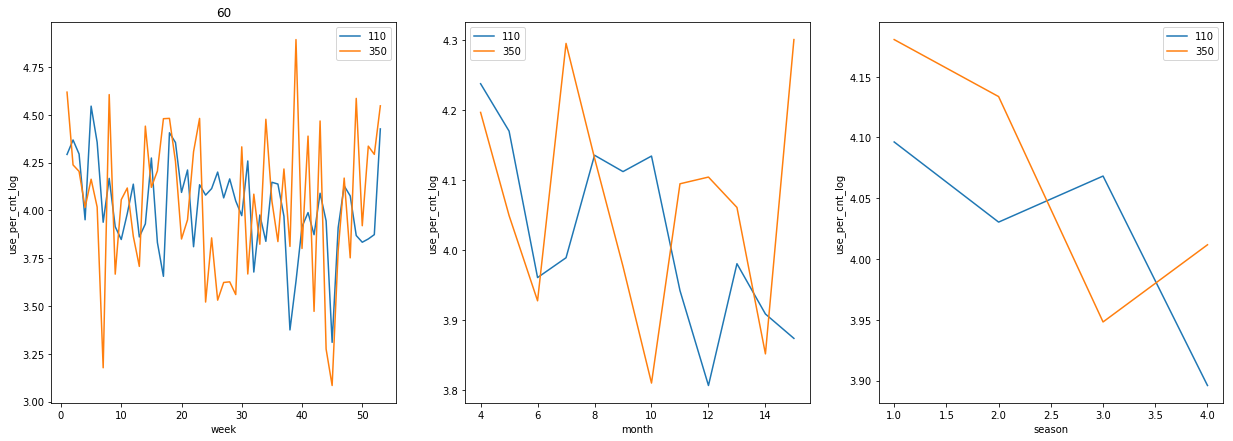

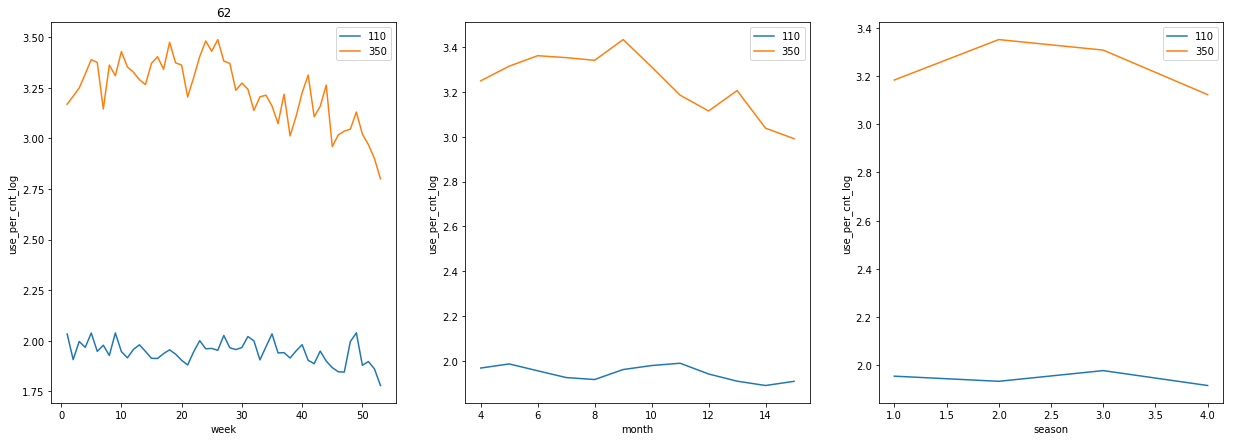

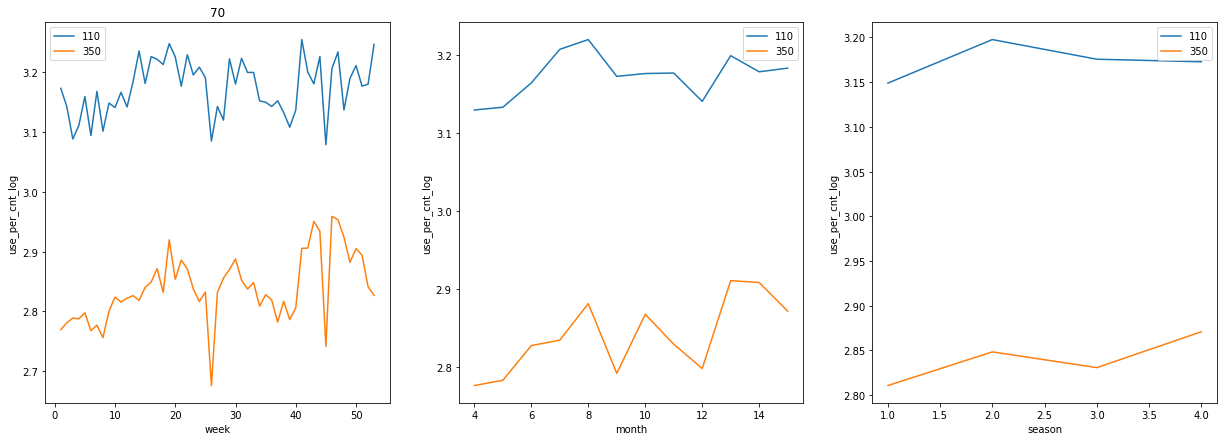

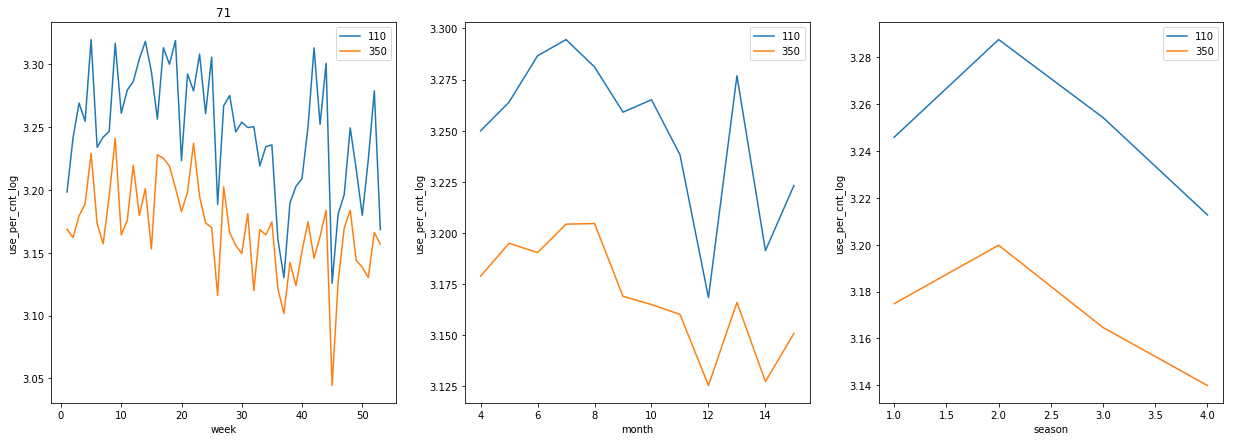

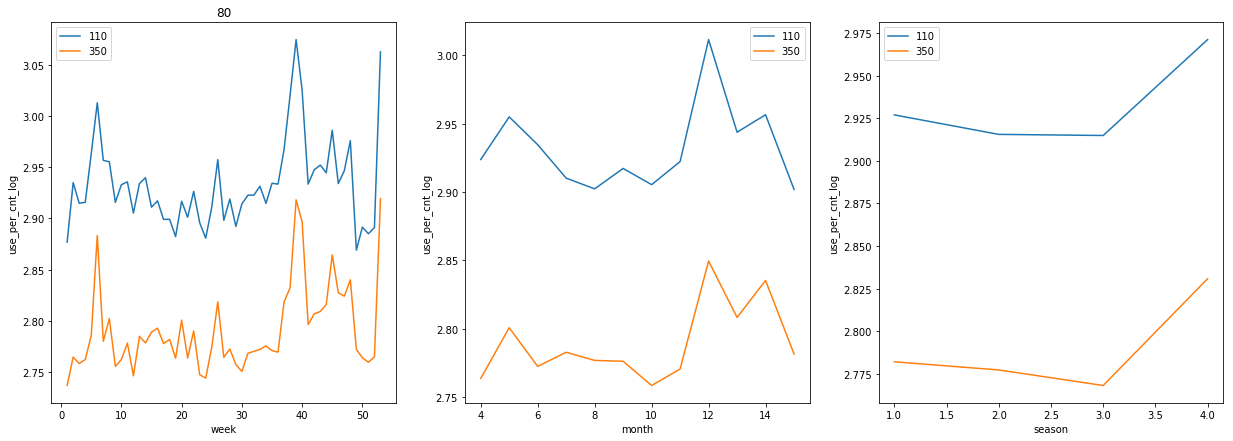

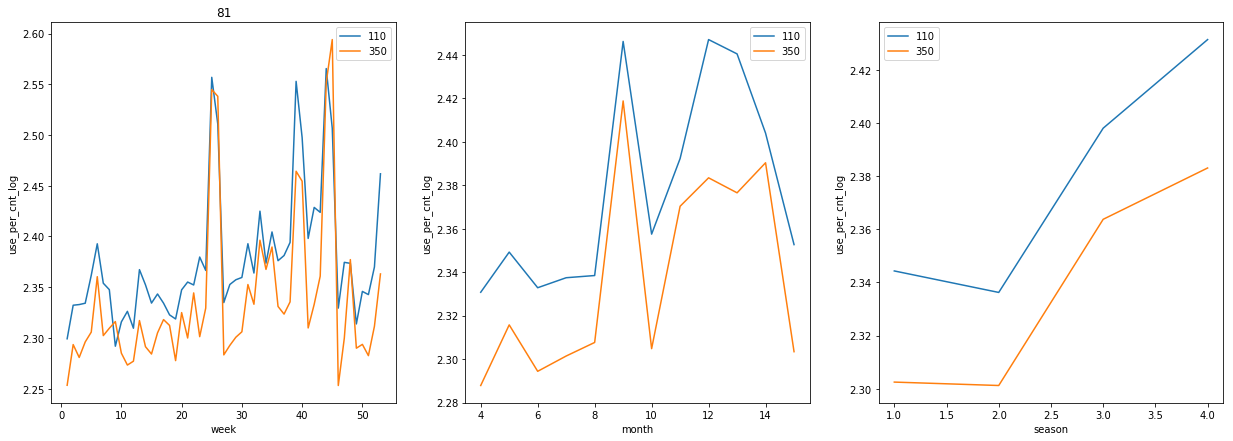

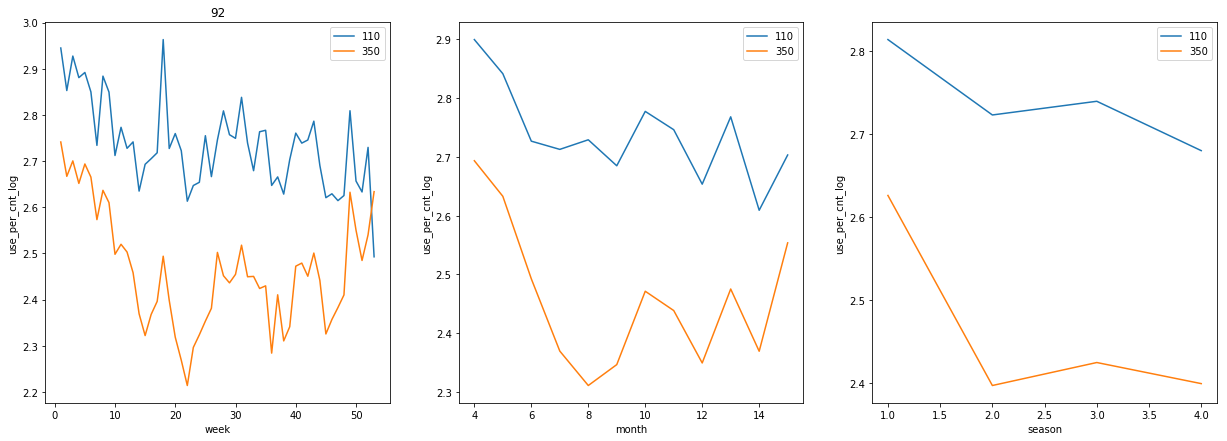

In [54]:
## 업종에 따른 추이 ; 구별
cnt = 0
Gu = card_spend_copy.GU_CD.unique()
for i in market_index:
    title = market_names[cnt]
    cnt+=1
    fig, ax = plt.subplots(1,3, figsize = (21,7))
    ax[0].title.set_text(i)
    for j in Gu:
        exec("tmp%d = card_spend_copy[card_spend_copy['GU_CD'] == %d]" % (j,j))
        exec("wk%d = tmp%d[tmp%d['MCT_CAT_CD'] == i].groupby('week').mean().use_per_cnt_log" % (j,j,j))
        exec("weekindx = wk%d.index" % j)
        exec("mth%d = tmp%d[tmp%d['MCT_CAT_CD'] == i].groupby('month').mean().use_per_cnt_log" % (j,j,j))
        exec("monthindx = mth%d.index" % j)
        exec("season%d = tmp%d[tmp%s['MCT_CAT_CD'] == i].groupby('season').mean().use_per_cnt_log" % (j,j,j))
        exec("season_indx = season%d.index" % j)
        #plot
        exec("sns.lineplot(x = week_indx, y = wk%d, ax = ax[0])" % j)
        exec("ax[0].legend(Gu)")
        exec("sns.lineplot(x = month_indx, y = mth%d, ax = ax[1])" % j)
        exec("ax[1].legend(Gu)")
        exec("sns.lineplot(x = season_indx, y = season%d, ax = ax[2])" % j)
        exec("ax[2].legend(Gu)")

In [ ]:
card_spend_copy['use_amt_log'] = np.log(card_spend_copy['USE_AMT'])

In [57]:
# processed data 저장
card_spend_copy.to_csv('CARD_PROCESSED.txt', index=False)